In [7]:
##Installing
# %%capture
!pip install fbprophet
!pip install -U statsmodels
!pip install colorama

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  C:\Users\hemra\AppData\Local\Temp\pip-install-w4jvi3k7\fbprophet_5099fac9bfb44ba988c833b71f4f1d31\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  NumExpr defaulting to 8 threads.
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\hemra\AppData\Local\Temp\pip-install-w4jvi3k7\fbprophet_5099fac9bfb44ba988c833b71f4f1d31\setup.py", line 122, in <module>
      setup(
    File "C:\Users\hemra\anaconda3\Lib\site-packages\setuptools\__init__.py", line 104, in setup
      ret

In [8]:
##Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit
# from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
from colorama import Fore, Back, Style
import seaborn as sns
# import plotly.express as px
import warnings
from matplotlib.patches import Patch

In [9]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

Loading Data

In [11]:
data= pd.read_csv(r"C:\Users\hemra\Downloads\AAPL.csv")

In [12]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


Data Describtion :-

Date : Date of trading

Open : Price at which security first trades

High : Highest Price of the trading day

Low : Lowest Price of the trading day

Close : Last Price the stock traded during the trading day

Adj Close : Price that is adjusts Coroporate Actions on Closing Price

Volume : Number of Shares that changed hands during the trading day

In [14]:
##Summary Statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [15]:
##Exploring Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


Data Preprocessing

In [17]:
##Dealing with Data Types
##Converting Date to DateTime Object
data['Date']

0       2012-01-03
1       2012-01-04
2       2012-01-05
3       2012-01-06
4       2012-01-09
           ...    
2006    2019-12-23
2007    2019-12-24
2008    2019-12-26
2009    2019-12-27
2010    2019-12-30
Name: Date, Length: 2011, dtype: object

In [18]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [19]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [20]:
##Making Date as Index 
data.set_index('Date',inplace=True)

In [21]:
data['Date'] = data.index

In [22]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012-01-03
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012-01-04
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012-01-05
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012-01-06
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012-01-09


In [23]:
##Checking Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

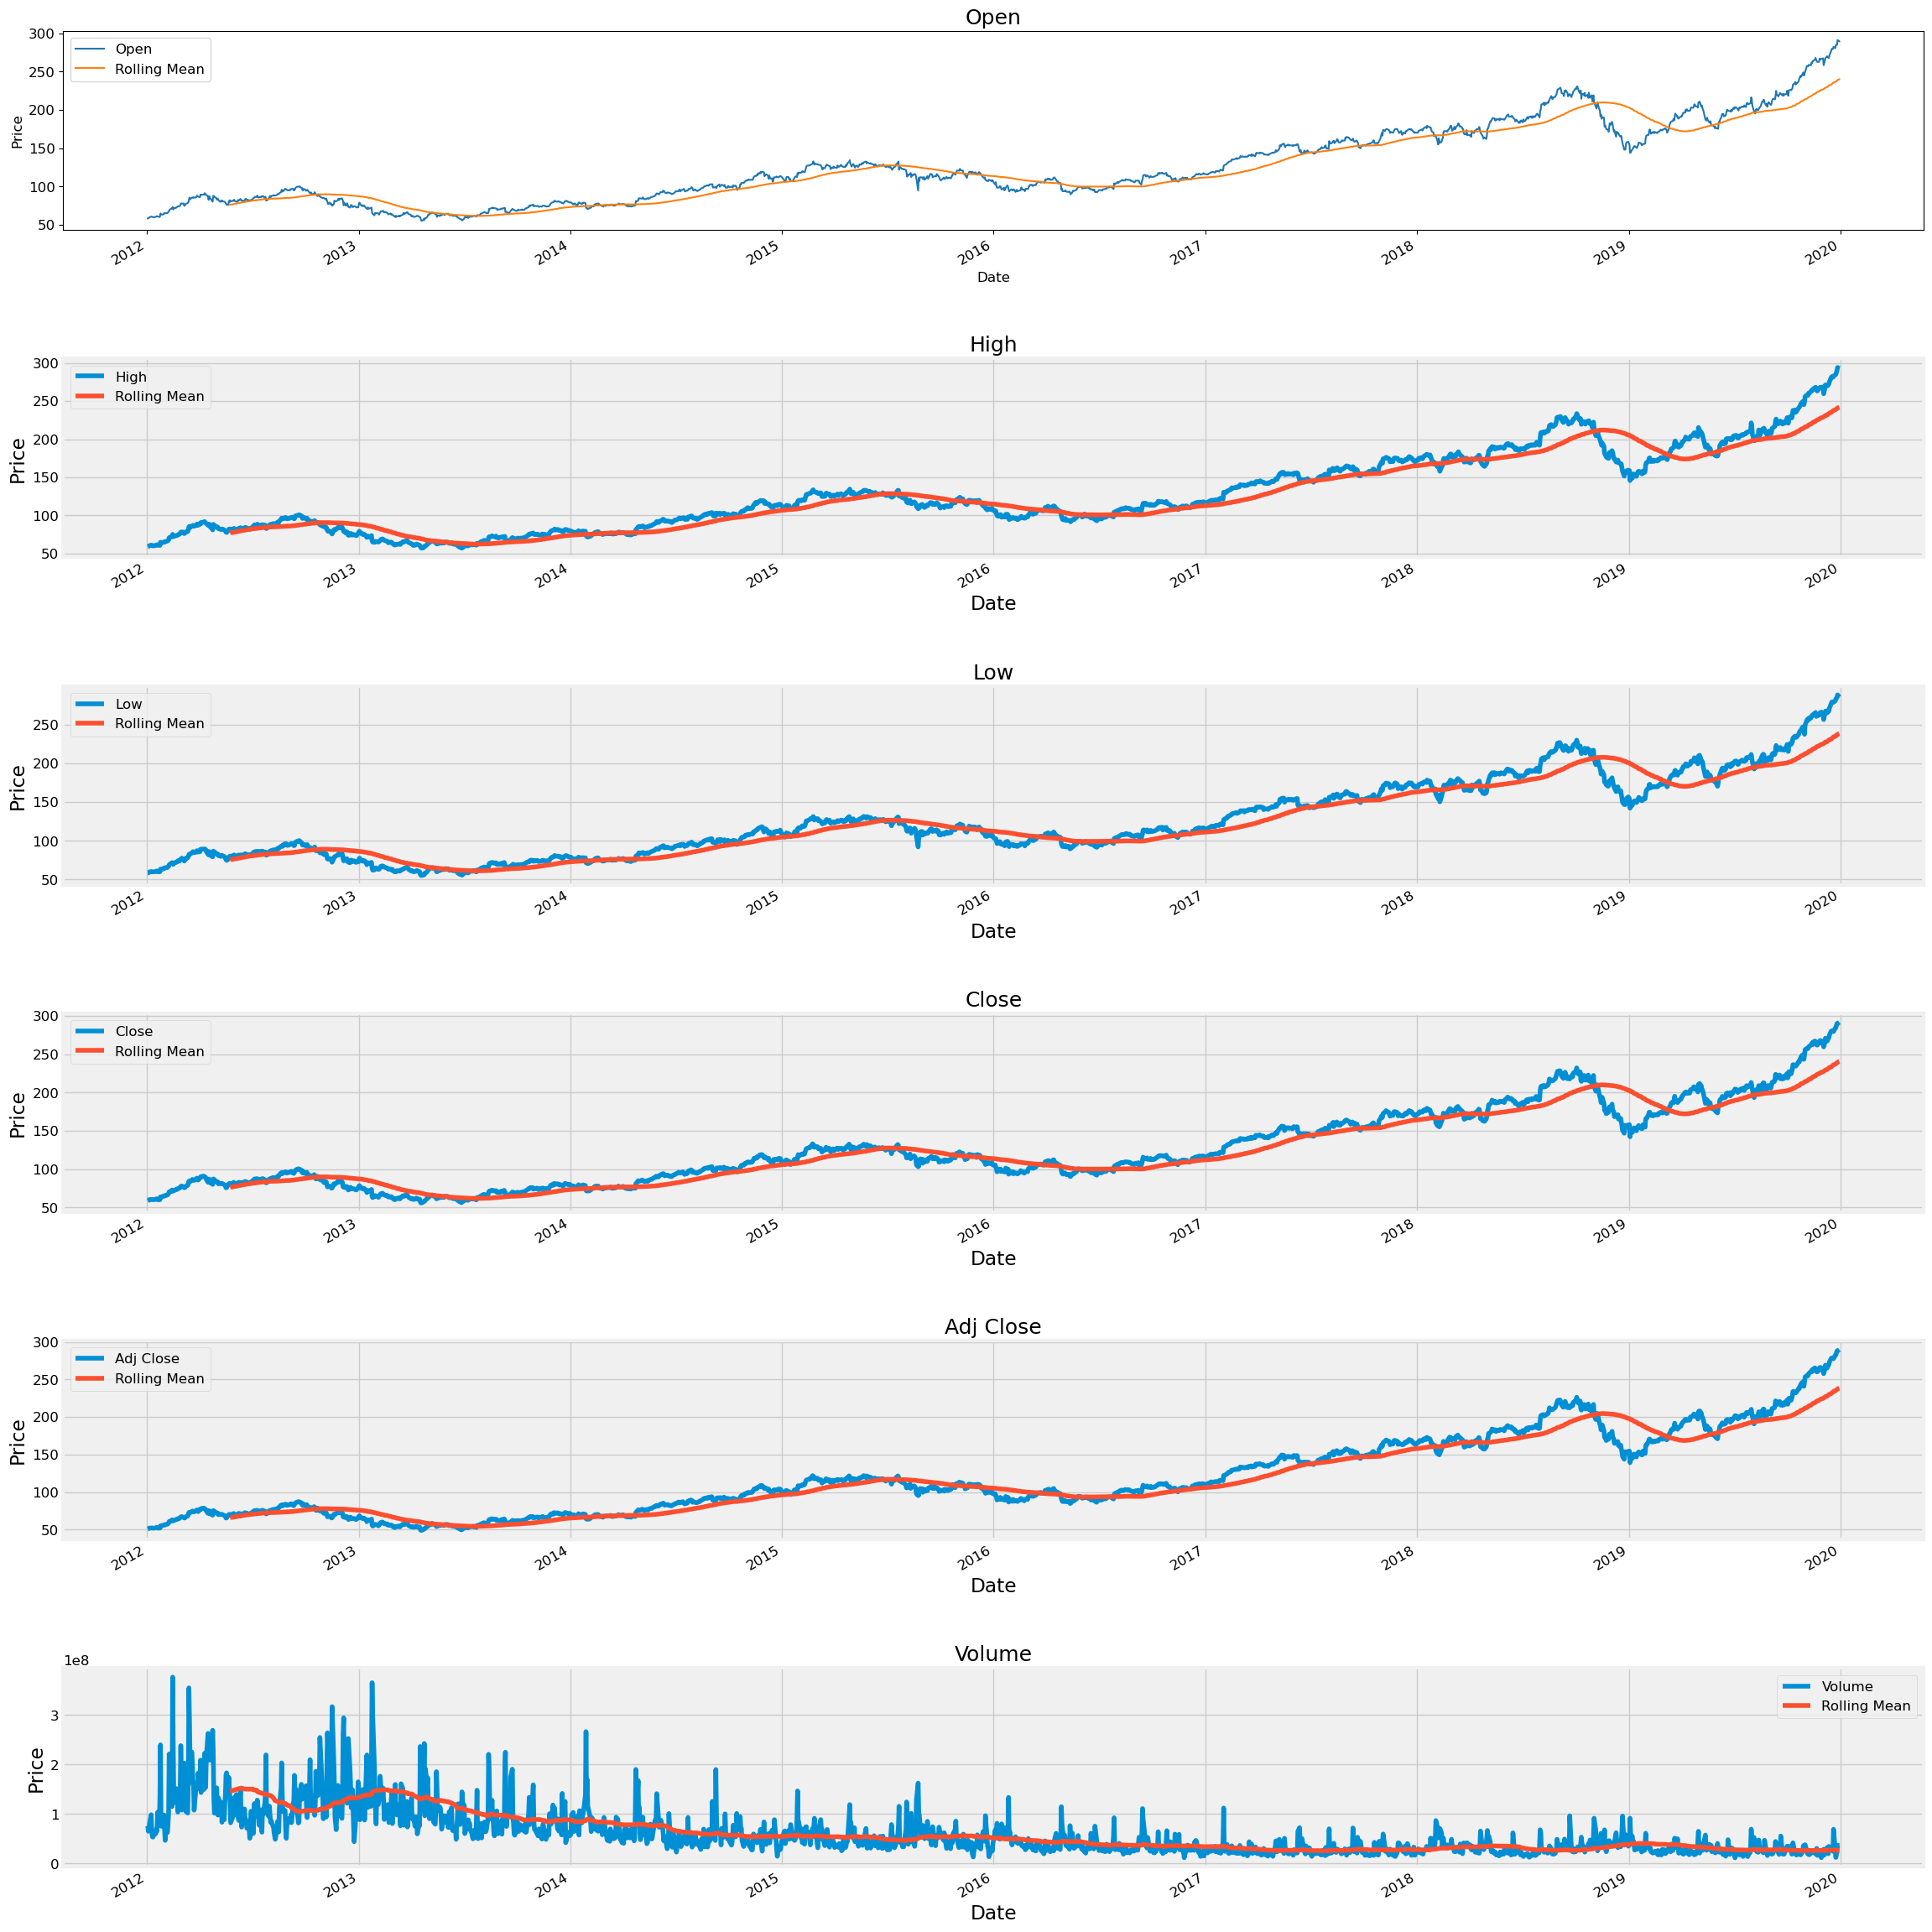

In [24]:
##Visualizing
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

Feature Selection
We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close .

We consider Adj Close as our target variables as it accounts for all corporate decisions like stock split and dividents.

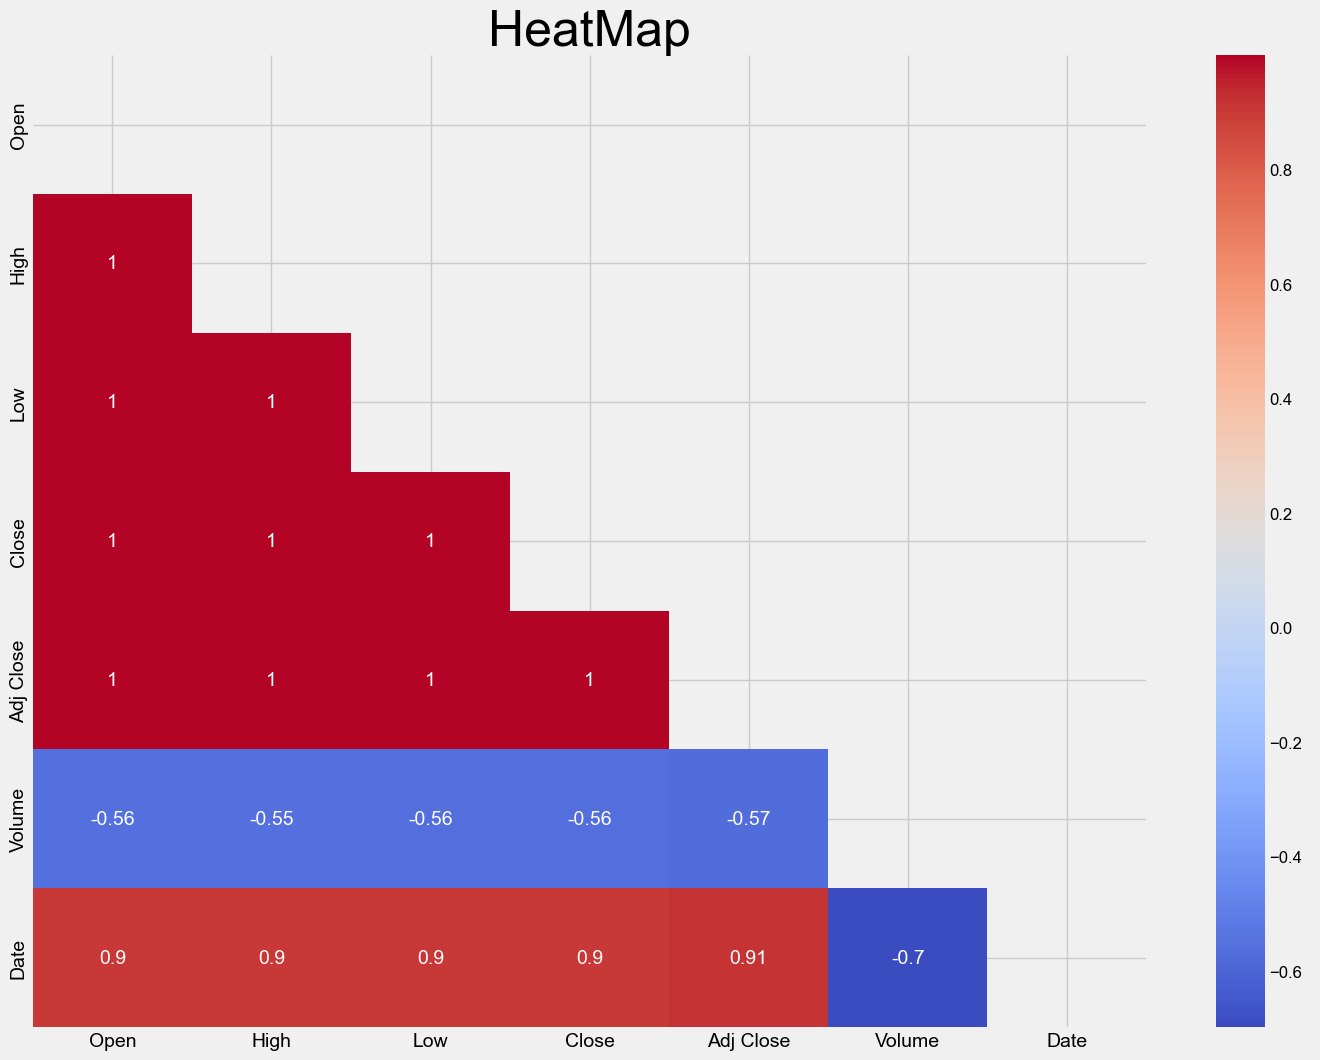

In [26]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [27]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])

In [28]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2012-01-03,2012-01-03,50.765709
2012-01-04,2012-01-04,51.038536
2012-01-05,2012-01-05,51.605175
2012-01-06,2012-01-06,52.144630
2012-01-09,2012-01-09,52.061932
...,...,...
2019-12-23,2019-12-23,282.054138
2019-12-24,2019-12-24,282.322266
2019-12-26,2019-12-26,287.923645


Resampling

In [30]:
##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

In [31]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Adj Close
Date,
2012-01-31,52.907298
2012-02-29,61.424381
2012-03-31,71.292448
2012-04-30,74.810151
2012-05-31,69.708045
...,...
2019-08-31,202.738817
2019-09-30,215.853332
2019-10-31,232.974974


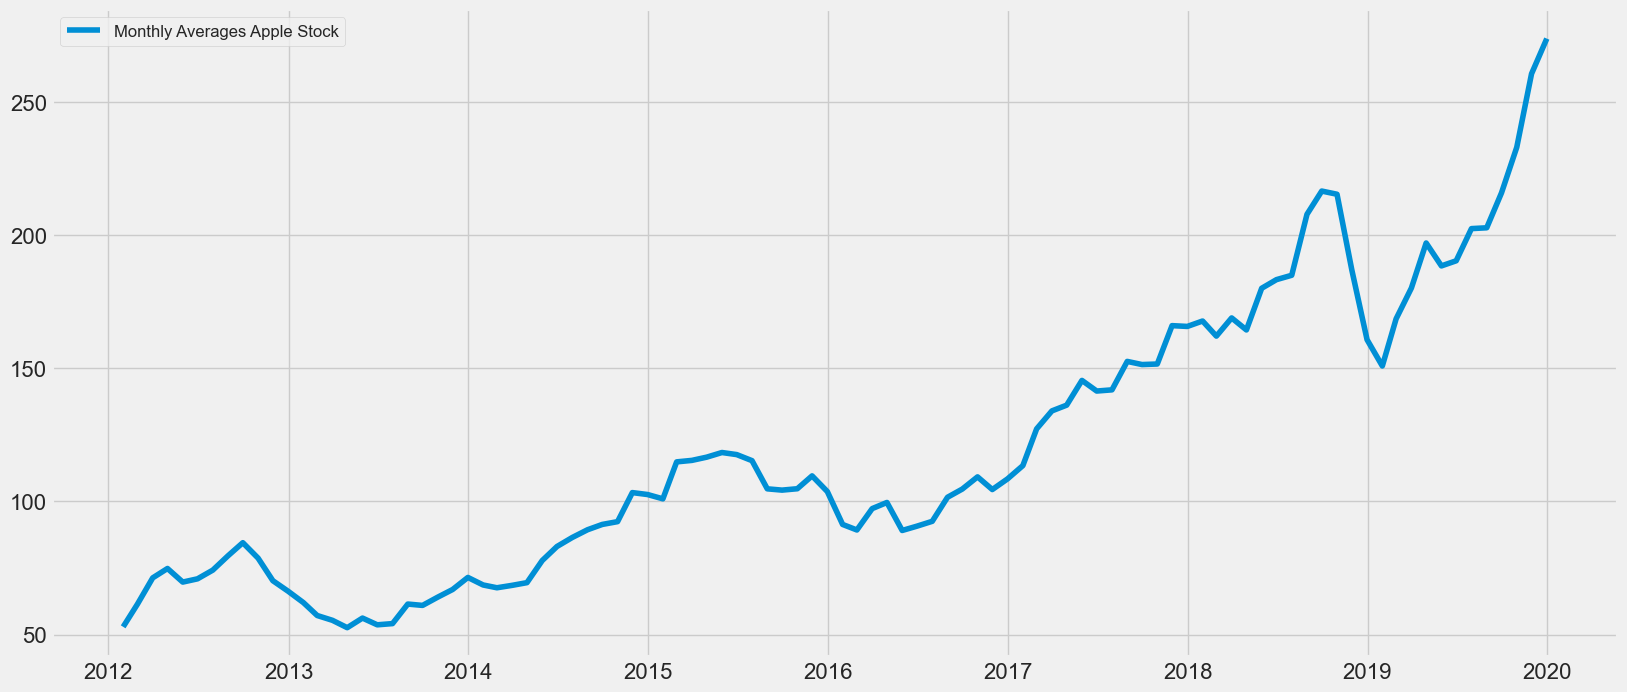

In [32]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

Exploratory Data Analysis

In [34]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2012-01-31,52.907298,2012,January,Tuesday,1
2012-02-29,61.424381,2012,February,Wednesday,1
2012-03-31,71.292448,2012,March,Saturday,1
2012-04-30,74.810151,2012,April,Monday,2
2012-05-31,69.708045,2012,May,Thursday,2
...,...,...,...,...,...
2019-08-31,202.738817,2019,August,Saturday,3
2019-09-30,215.853332,2019,September,Monday,3
2019-10-31,232.974974,2019,October,Thursday,4


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.006, '0.006'),
  Text(0, 0.008, '0.008'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.012, '0.012')])

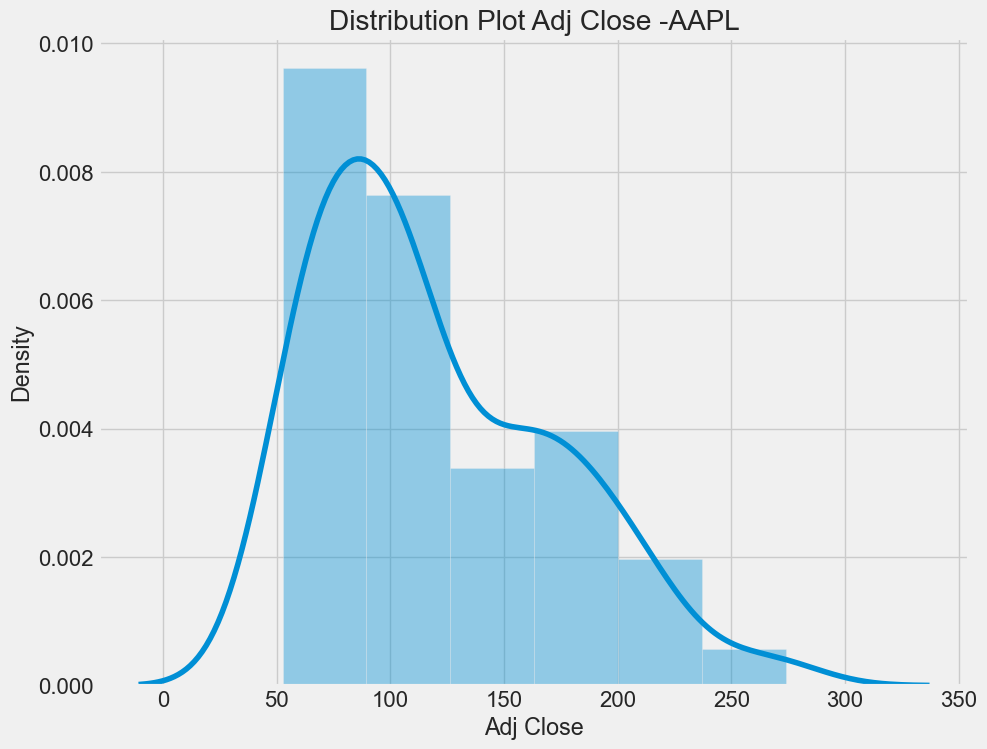

In [35]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

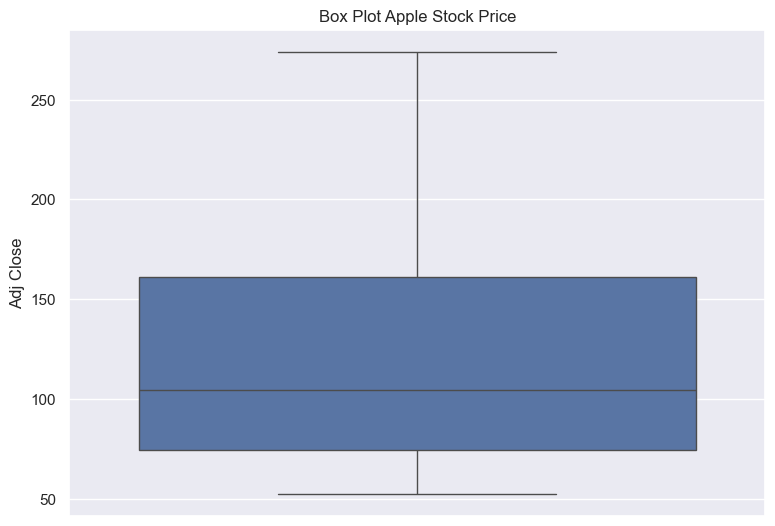

In [36]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')

Box-Plot Inference :-

->Distribution shows Right Skew

->Outlier towards the higher end around Stock price of 300$

Text(0.5, 1.0, 'QQ Plot Apple Stock Price')

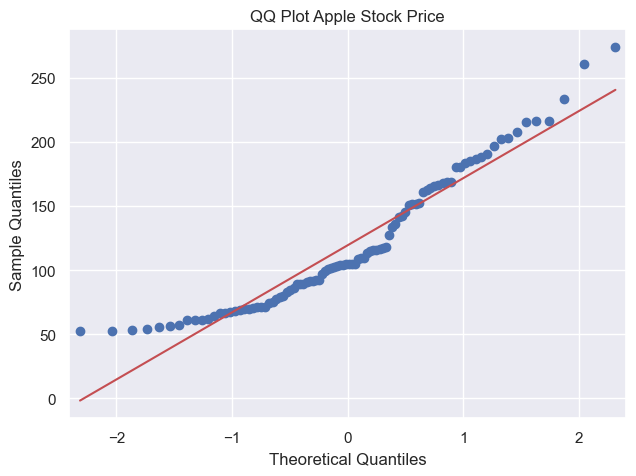

In [38]:
qq_plot = qq(monthly_data['Adj Close'],line='s')
plt.title('QQ Plot Apple Stock Price')

QQ plot Inference :-

->Heavy Tailed Distribution-Curve at Extremities

-> Shows extent of both right and left skews

->Shows Distribution is Not following Gaussian Normal Distribution

In [40]:
print('Skewness of Distribution is ',monthly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',monthly_data['Adj Close'].kurtosis())

Skewness of Distribution is  0.8054131572723979
Kurtosis of Distribution is  -0.11205074257880643


Stock Price is Heavily skewed -Right tailed Skewness

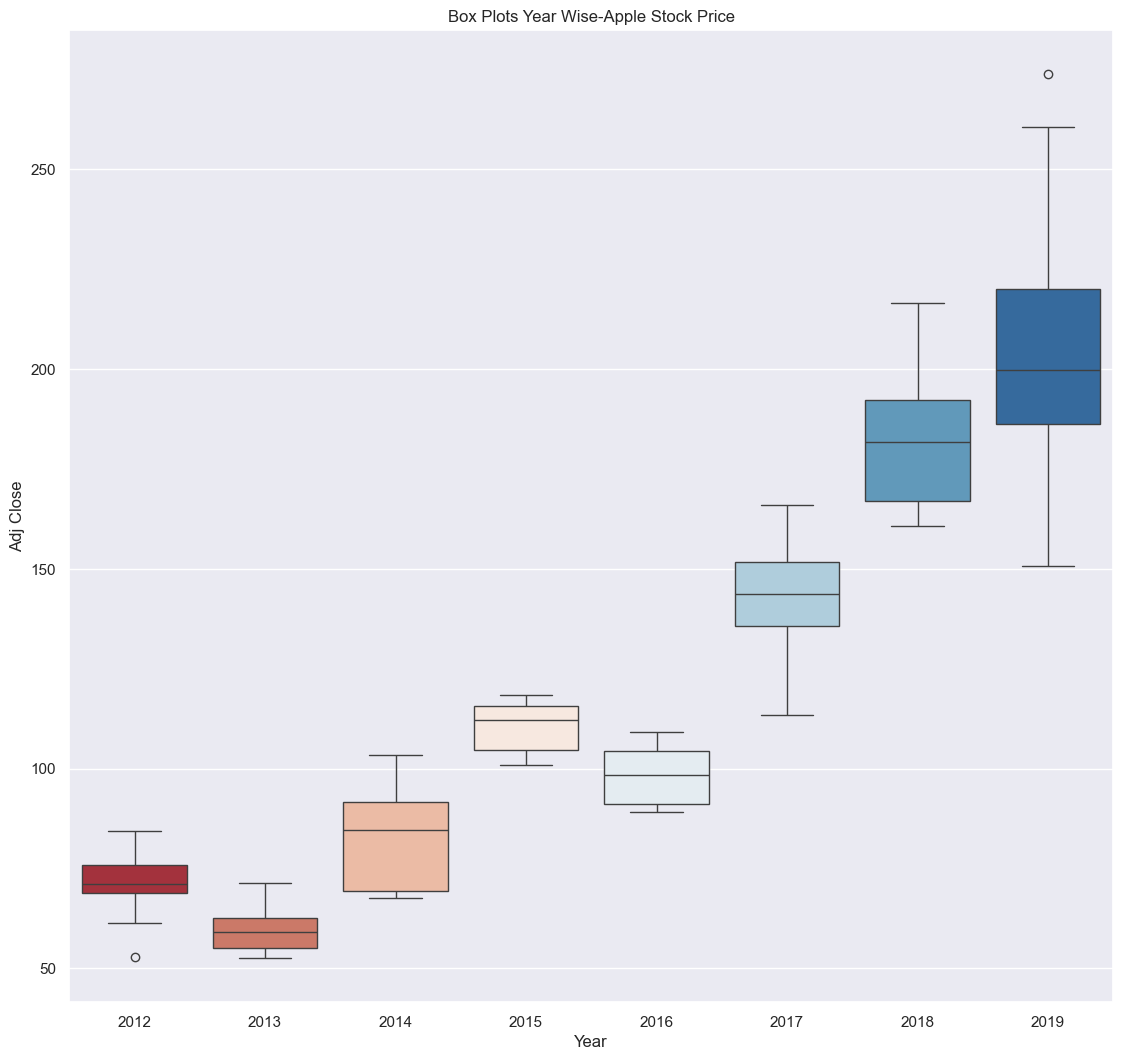

In [42]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

Inferences Box Plot

->Outliers Present in Year 2012 and 2019

->Lot of Variability in Years 2014, 2017-19

->2019 most volatile year among all years

->Upward Rising Trend is shown

In [44]:
print(monthly_data.head())  # Display the first few rows to inspect the structure
print(monthly_data.columns)  # Check the columns in the DataFrame
list_years = monthly_data['Year'].unique()
print(list_years)  # Print the unique years to verify they are as expected
import pandas as pd
from scipy import stats

# Initialize variables
dict_IQR = {}

# Iterate over each unique year
for yr in list_years:
    # Filter the DataFrame for the current year
    filtered_data = monthly_data[monthly_data['Year'] == yr]['Adj Close']
    
    # Check if filtered_data is not empty before calculating IQR
    if not filtered_data.empty:
        dict_IQR[str(yr)] = stats.iqr(filtered_data)

print(dict_IQR)


            Adj Close  Year     Month  dayofweek  quarter
Date                                                     
2012-01-31  52.907298  2012   January    Tuesday        1
2012-02-29  61.424381  2012  February  Wednesday        1
2012-03-31  71.292448  2012     March   Saturday        1
2012-04-30  74.810151  2012     April     Monday        2
2012-05-31  69.708045  2012       May   Thursday        2
Index(['Adj Close', 'Year', 'Month', 'dayofweek', 'quarter'], dtype='object')
[2012 2013 2014 2015 2016 2017 2018 2019]
{'2012': 6.933146515313851, '2013': 7.476562772903726, '2014': 22.34296344824017, '2015': 11.10740590584416, '2016': 13.310573720864653, '2017': 16.22455365139379, '2018': 25.26202036594205, '2019': 33.78399483999857}


In [45]:
##Interquartile Range(IQR) Year Wise for Stock Price
dict_IQR

{'2012': 6.933146515313851,
 '2013': 7.476562772903726,
 '2014': 22.34296344824017,
 '2015': 11.10740590584416,
 '2016': 13.310573720864653,
 '2017': 16.22455365139379,
 '2018': 25.26202036594205,
 '2019': 33.78399483999857}

Text(0, 0.5, 'InterQuartile Range')

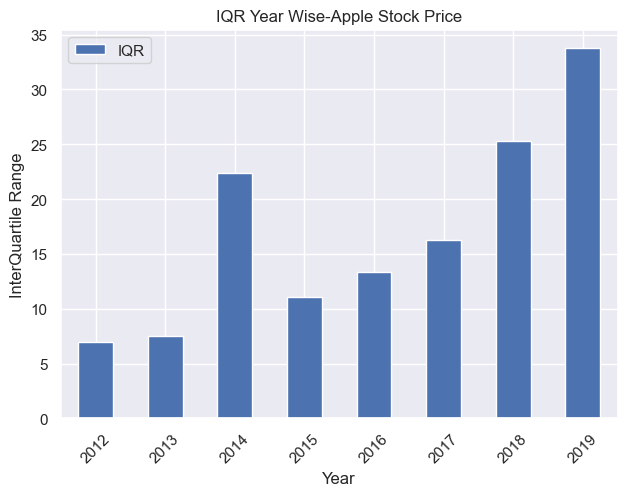

In [46]:
IQR_df = pd.DataFrame(dict_IQR.items(),columns=['Year','IQR'])
IQR_df.index = IQR_df['Year']
IQR_df.plot(kind='bar')
plt.xticks(rotation=45)
plt.style.context('fivethirtyeight')
plt.title('IQR Year Wise-Apple Stock Price')
plt.ylabel('InterQuartile Range')

->When Data is Not Normal Inter-Quartile Range(IQR) is Better Variability Metric than Standard Deviation as IQR is not affected by outliers.

->As observed with BoxPlot 2014 and 2019 are the most volatile Years for Apple Stock

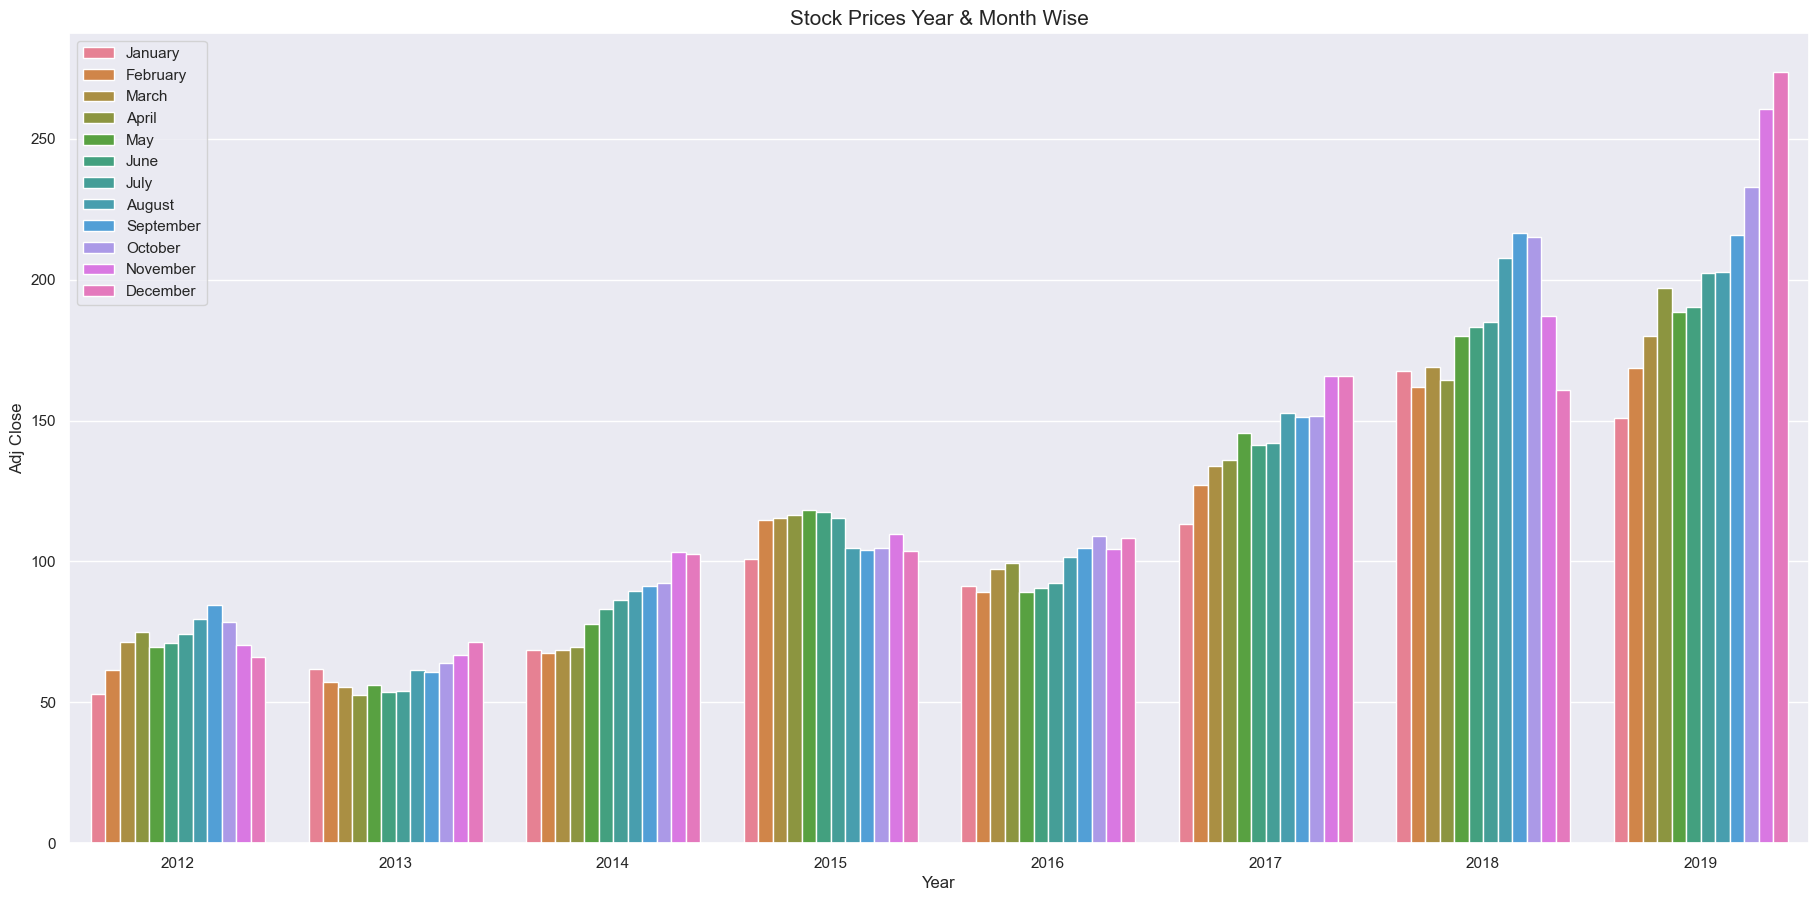

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time,the Wallstreet is excited about upcoming products .

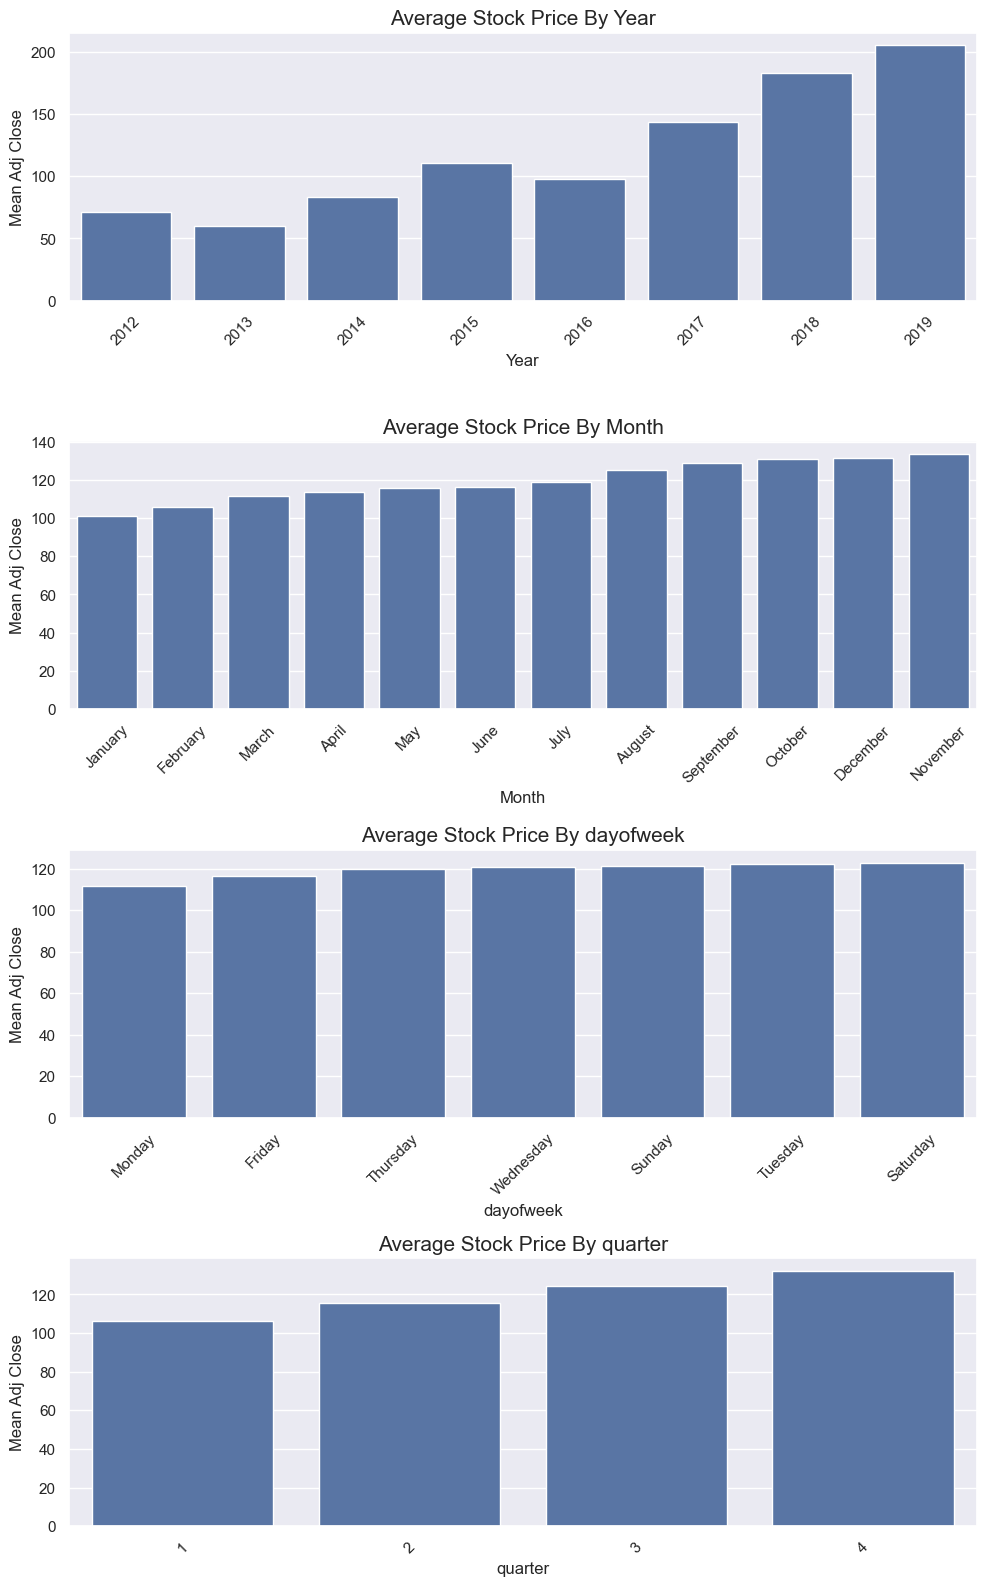

In [50]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
  sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Adj Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

->According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.

->Average Stock Price is lower at start of the week in comparision to the end of the week.

->The Average Price is Highest in the Month of November.

->Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

Decomposition of Time Series

<Figure size 2000x1600 with 0 Axes>

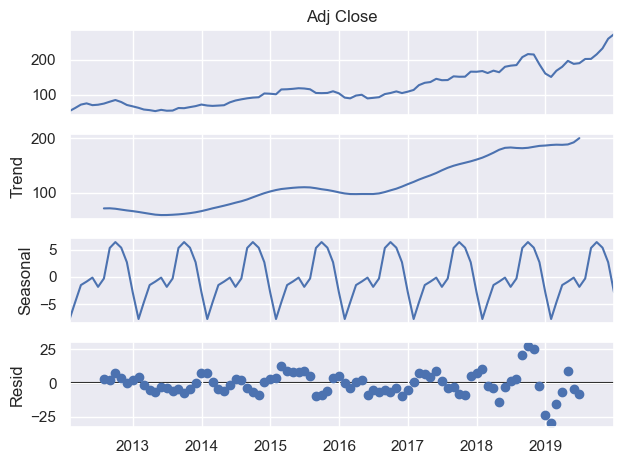

In [53]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set figure size
plt.figure(figsize=(20, 16))

# Perform decomposition
decomposed_series = seasonal_decompose(monthly_data['Adj Close'], model='additive', period=12)

# Plot decomposed series
decomposed_series.plot()
plt.show()


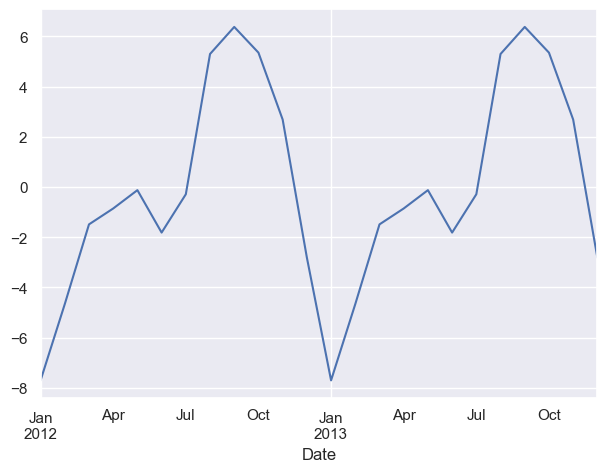

<Figure size 800x800 with 0 Axes>

In [54]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))


Inferences By Decomposition :-

->Trend : Overall an Upward Trend

-> Seasonality :There appears to be seasonality,AAPL has rallied during the Holiday season as expected. Since Holiday period has good sales for Apple Over the Years.

Stationarity of Time Series

Stationarity Test of Time Series

Using Augmented Dickey-Fuller(ADF) Test

Null Hypothesis : Time series has a unit root -It is non-stationary

Alternate Hypothesis : Time series does not have a unit root -It is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality

In [58]:
##ADF Test-Statsmodels Library

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

In [59]:
ad_fuller_func(monthly_data['Adj Close'])

ADF Statistic: 1.339253
p-value: 0.996820
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
Failed to Reject Ho-Time Series is Non-Stationary


Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)

Statistically verified by ADF Test
AutoCorrelation Function(ACF)


Text(0.5, 0, 'Lags')

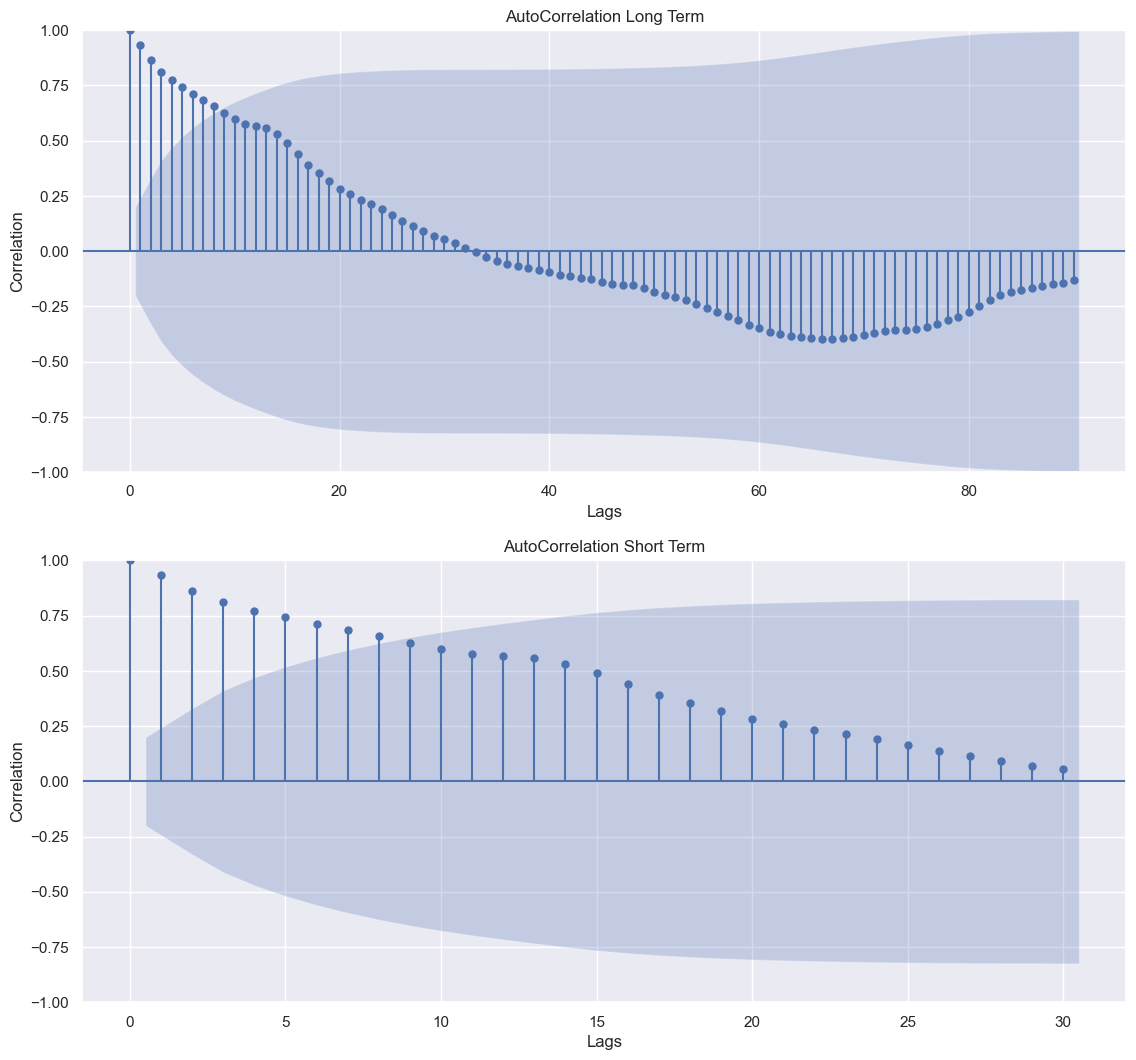

In [61]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')


Interpreting ACF Plot :-

->Slow Decay of correlation values indicates that the future values are heavily dependent on the lagged values . This shows that the series is not random and good for time series modelling .

->Also tells us series is Non-stationary

->It indicates a MA(1) process

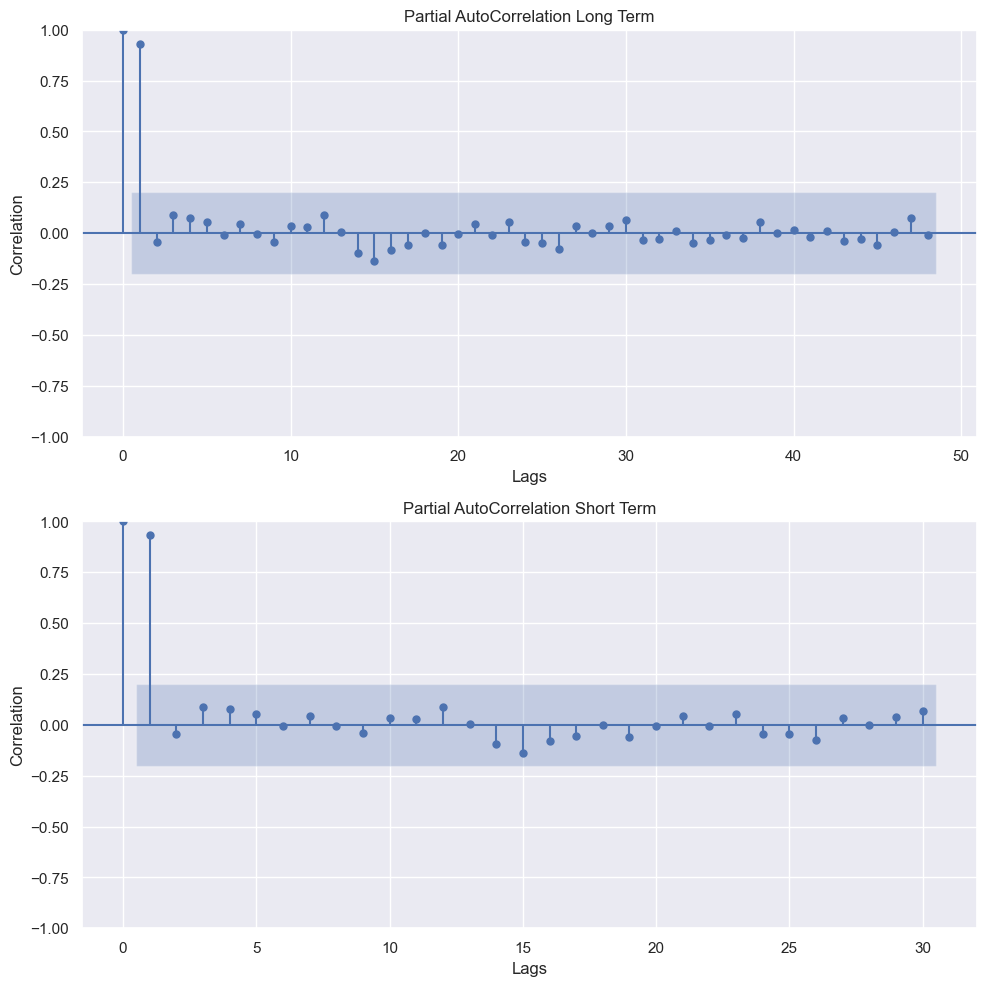

In [63]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Ensure that the number of lags does not exceed 50% of the sample size
sample_size = len(monthly_data['Adj Close'])
max_lags = sample_size // 2

# Plot PACF with appropriate number of lags
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

plot_pacf(monthly_data['Adj Close'], lags=min(90, max_lags), ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

plot_pacf(monthly_data['Adj Close'], lags=min(30, max_lags), ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout(pad=1)
plt.show()


Interpreting PACF Plot :-

->Sudden Decay at Lag-1

->Order of series seems AR(1)

Transformations To Make Series Stationary

In [66]:
##Differencing By 1
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)

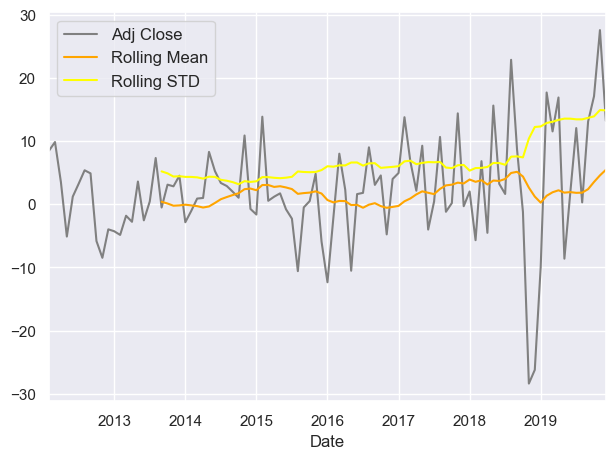

In [67]:
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The series looks stationary as its having constant mean and variance .

In [69]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(monthly_diff[1:])

ADF Statistic: -6.501865
p-value: 0.000000
Critical Values:
	1%: -3.502
	5%: -2.893
	10%: -2.583
Reject Null Hypothesis(Ho)-Time Series is Stationary


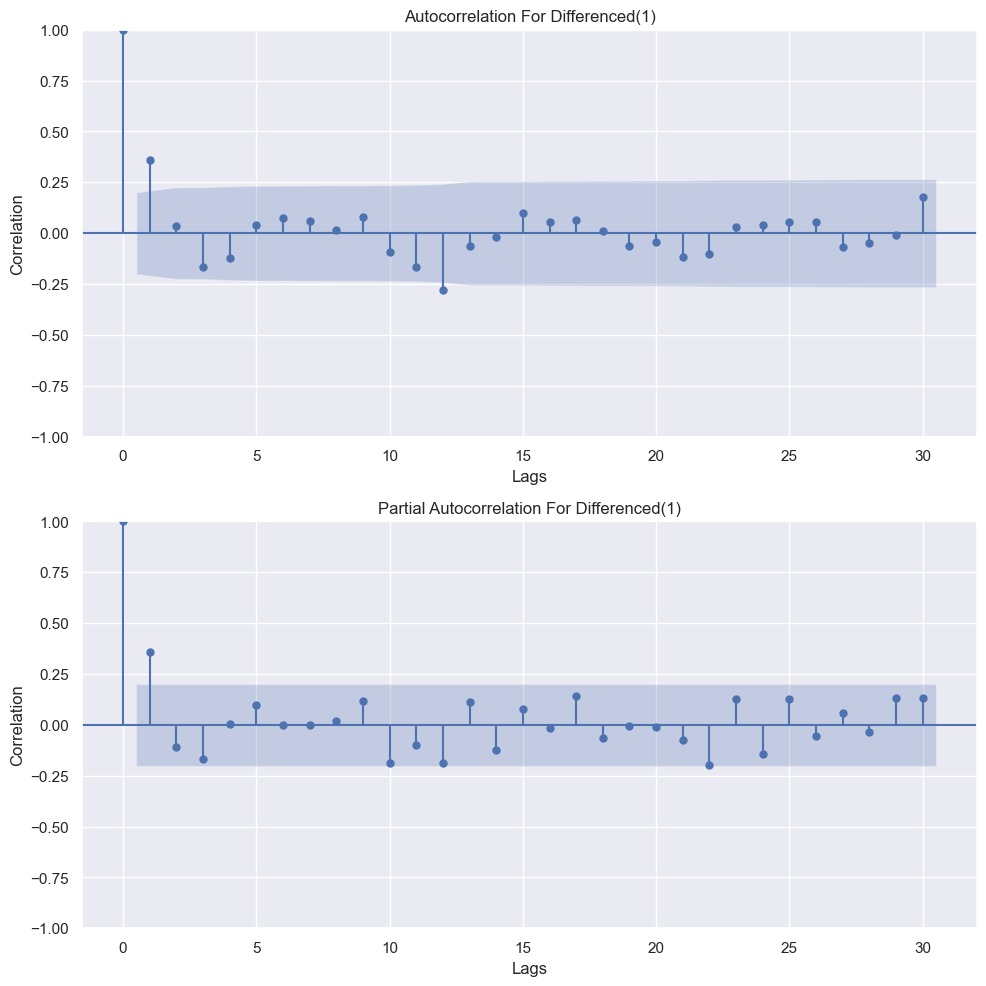

In [70]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

According to the ACF and PACF we can confirm that Differencing once has transformed series into Stationary

Modelling Seasonal ARIMA

In [73]:
modelling_series = monthly_data['Adj Close']
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780717
Freq: ME, Name: Adj Close, Length: 96, dtype: float64

Train-Test Split

In [75]:
train,test = split(modelling_series,train_size=0.6,shuffle=False)

In [76]:
train.head(2)

Date
2012-01-31    52.907298
2012-02-29    61.424381
Freq: ME, Name: Adj Close, dtype: float64

In [77]:
test.head(2)

Date
2016-10-31    109.212791
2016-11-30    104.453936
Freq: ME, Name: Adj Close, dtype: float64

In [78]:
print('Train',len(train))
print('Test',len(test))

Train 57
Test 39


In [79]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


In [80]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Carrying out Grid Search to Select Parameters especially for Seasonal Component of the Time Series .

Parameters for Series already indicate Non-Seasonality Part with Order (1,1,1).

AR(1) derived by the PACF plot

MA(1) derived by the ACF Plot

Differencing(1) derived by differencing and observing stationarity.

Hyper Parameter Tuning for Model Orde

In [83]:
list_param = []
list_param_seasonal=[]
list_results_aic=[]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:660.0393312743108
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:489.7460184417519
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:353.4965874358352
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:407.6767009067285
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1143.5924227854819
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:190.03613003680556
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:329.45303932477185
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:199.04766684849798
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:77.50850683121519
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:416.9246268146381
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:390.86362421379005
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:291.60796504050705
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:313.34763567779584
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1071.1122601790453
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:191.5786315606187
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:216.19853387952404
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:199.6202058536163
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:72.11098812152362
A

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:350.75081385350666

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:332.11071968501557

ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:300.4957600928522

ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:286.2126039361744

ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:331.740255110838

ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:333.46473592208514

ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:324.7832626860535

ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:262.4409992969335

ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:256.71390487682834

ARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:206.26186908985358

ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:206.79066847021136

ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:459.6835652708871

ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:386.9565978957946

ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:3937.920519627023

By Observing the Lowest AIC , we come to Seasonality Order of (2,2,0)12 and non-seasonal component is (1,1,1) as derived earlier by correlograms.

Seasonal Arima is used as we have seasonality component present. During Fall time period (July-Nov) the stock seems to rally on the news of product launch and product releases in that cycle of the year.

Back-Testing Training and Testing Data
Since we cannot use cross validation in our time series based datasets,as it can jumble the datasets during different folds.

This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. We can use backtesting method for time series.

In backtesting we can create multiple train-test splits keeping in mind the temporal order of our data during splits . For example if I have dataset between Jan to Dec

Split - 1 : Train Data (Jan to Aug) + Test Data (Aug to Dec)

Split - 2 : Train Data (Jan to Sept) + Test Data (Sept to Dec)

Split - 3 : Train Daata (Jan to Oct) + Test Data (Oct to Dec) and so on ... We can have multiple splits in our dataset to validate our model rather than just one split like traditional train test splits .

Reference : https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

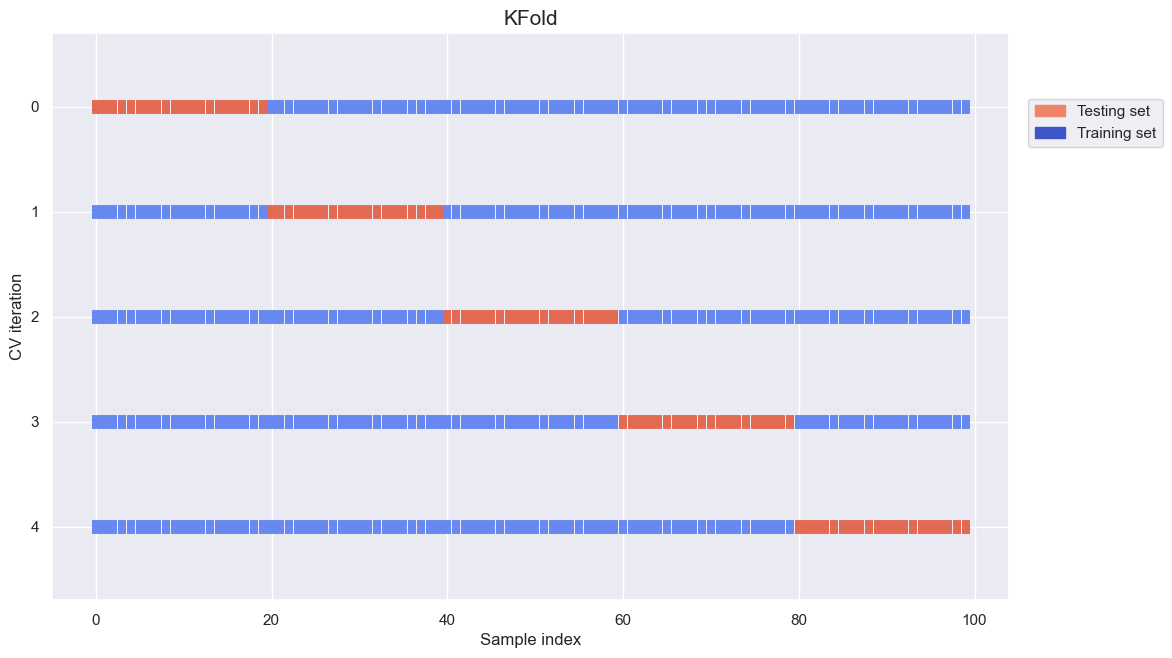

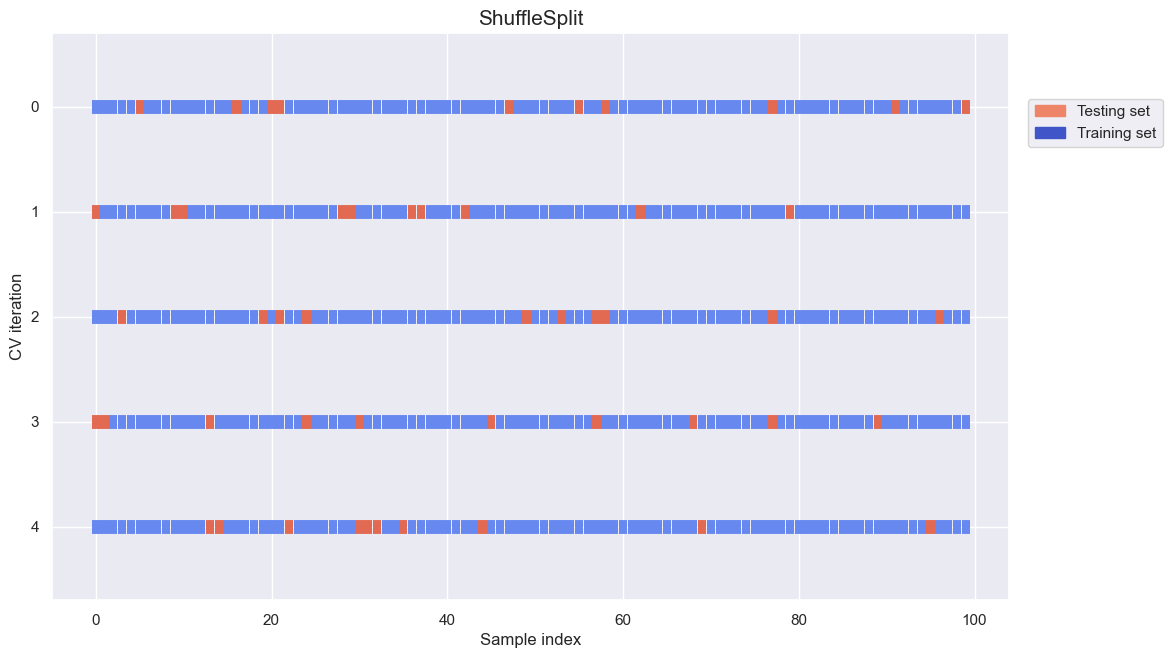

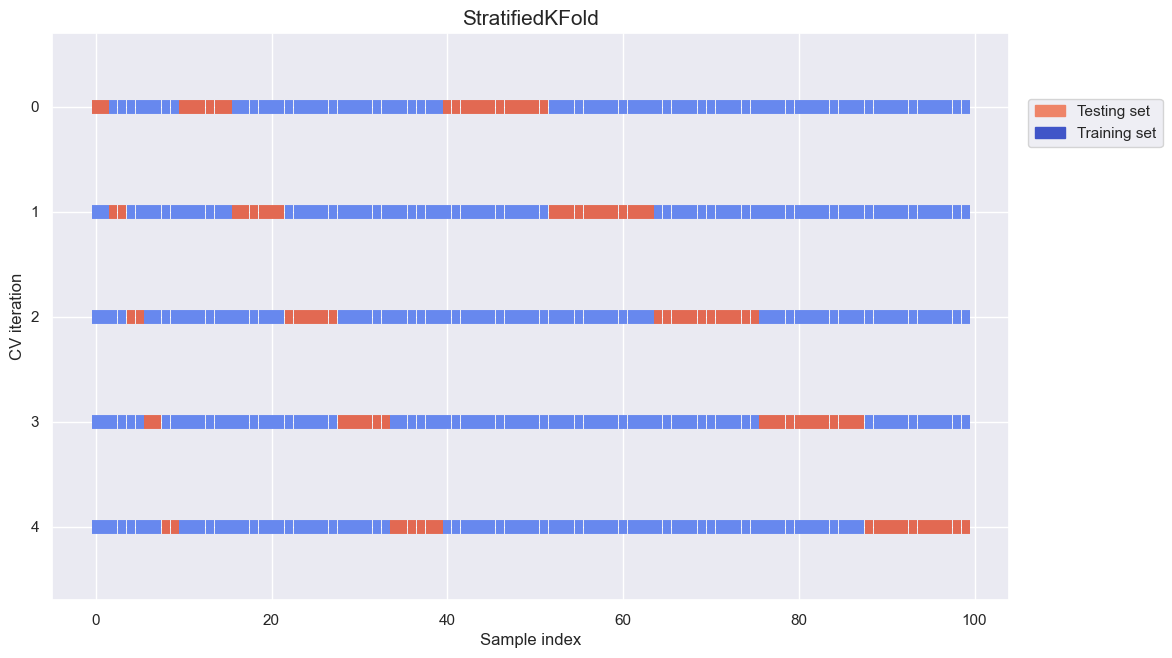

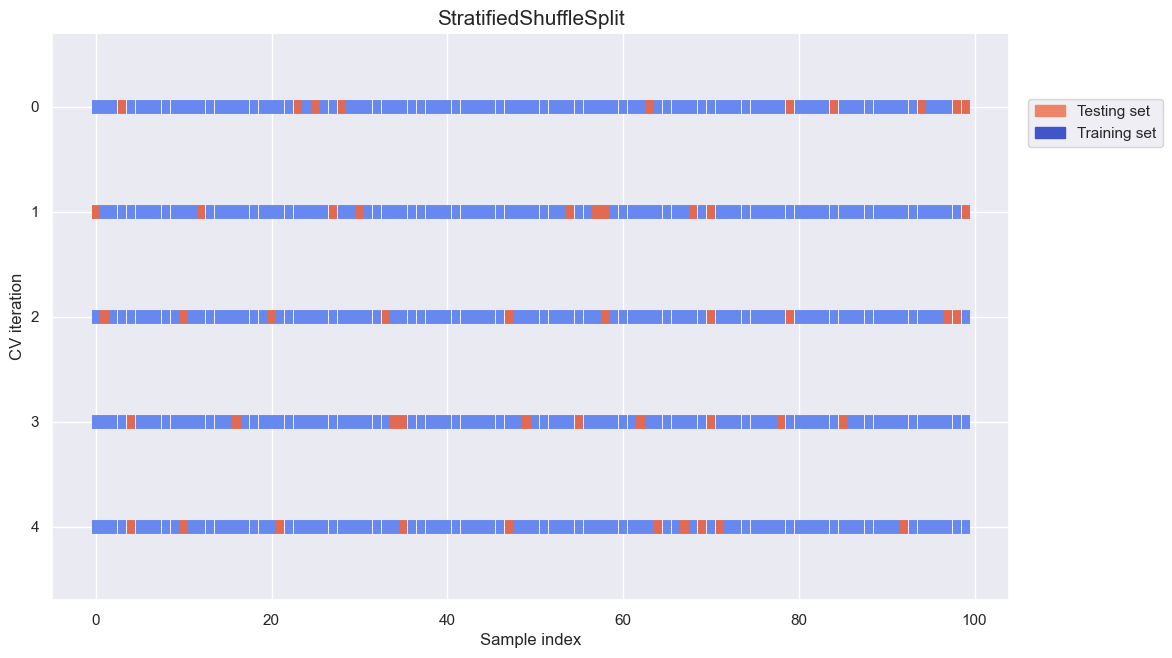

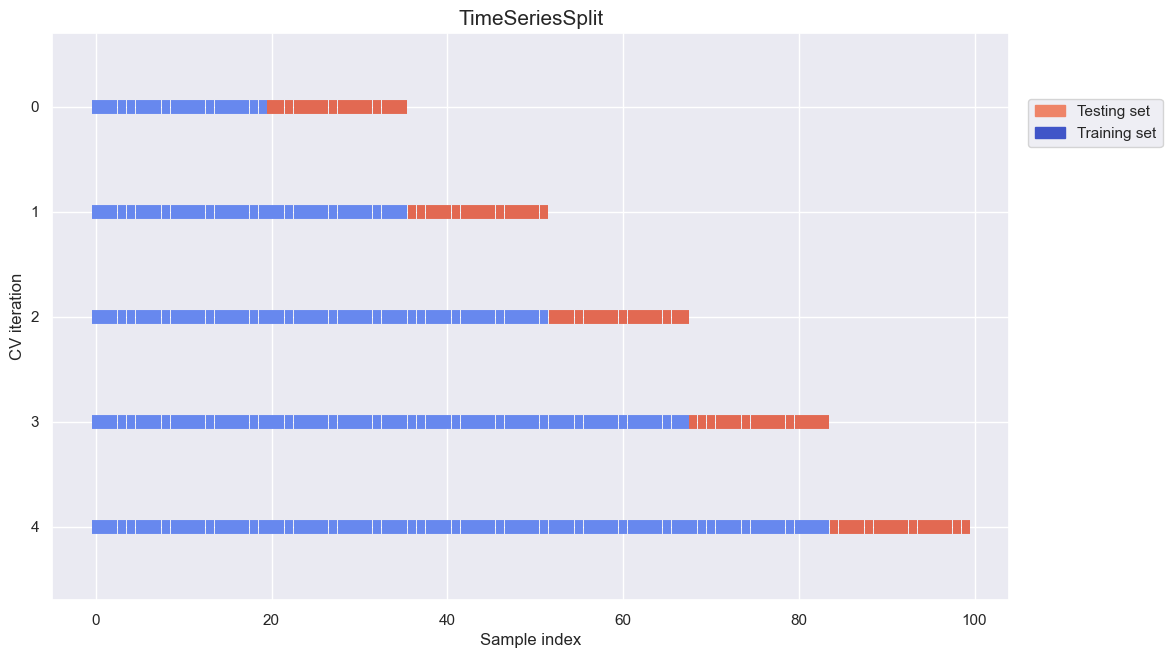

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit

# Define a colormap (cmap)
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, n_splits, X, y, date_col=None):
    """Create a sample plot for indices of a cross-validation object."""
    
    fig, ax = plt.subplots(1, 1, figsize=(11, 7))
    
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=10, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Formatting
    yticklabels = list(range(n_splits))
    
    if date_col is not None:
        tick_locations = ax.get_xticks()
        tick_dates = [" "] + date_col.iloc[list(tick_locations[1:-1])].astype(str).tolist() + [" "]

        tick_locations_str = [str(int(i)) for i in tick_locations]
        new_labels = ['\n\n'.join(x) for x in zip(tick_locations_str, tick_dates)]
        ax.set_xticks(tick_locations)
        ax.set_xticklabels(new_labels, rotation=90)  # Added rotation for better readability

    # Ensure number of y-ticks matches yticklabels
    y_ticks = np.arange(n_splits + 2) + .5
    if len(yticklabels) != len(y_ticks):
        y_ticks = np.arange(len(yticklabels)) + .5

    ax.set(yticks=y_ticks, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits + 0.2, -0.2])
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)

# Example usage
cvs = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, TimeSeriesSplit]
n_points = 100
n_splits = 5
X = np.random.randn(100, 10)
percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

for i, cv in enumerate(cvs):
    this_cv = cv(n_splits=n_splits)
    plot_cv_indices(this_cv, n_splits, X, y, date_col=None)


In [91]:
## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
pyplot.figure(1)
fig = plt.figure(figsize=(12, 12))

index = 1
for train_index, test_index in time_series_splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
    
# 	pyplot.subplot(310 + index)
# 	pyplot.plot(train)
# 	pyplot.plot([None for i in train] + [x for x in test])
#     # pyplot.title(''.format())
# 	index += 1
# pyplot.show()

Observations: 39
Training Observations: 20
Testing Observations: 19
Observations: 58
Training Observations: 39
Testing Observations: 19
Observations: 77
Training Observations: 58
Testing Observations: 19
Observations: 96
Training Observations: 77
Testing Observations: 19


<Figure size 640x480 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [99]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=5)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [101]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')


    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')


    
    

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

Backtest Set 1

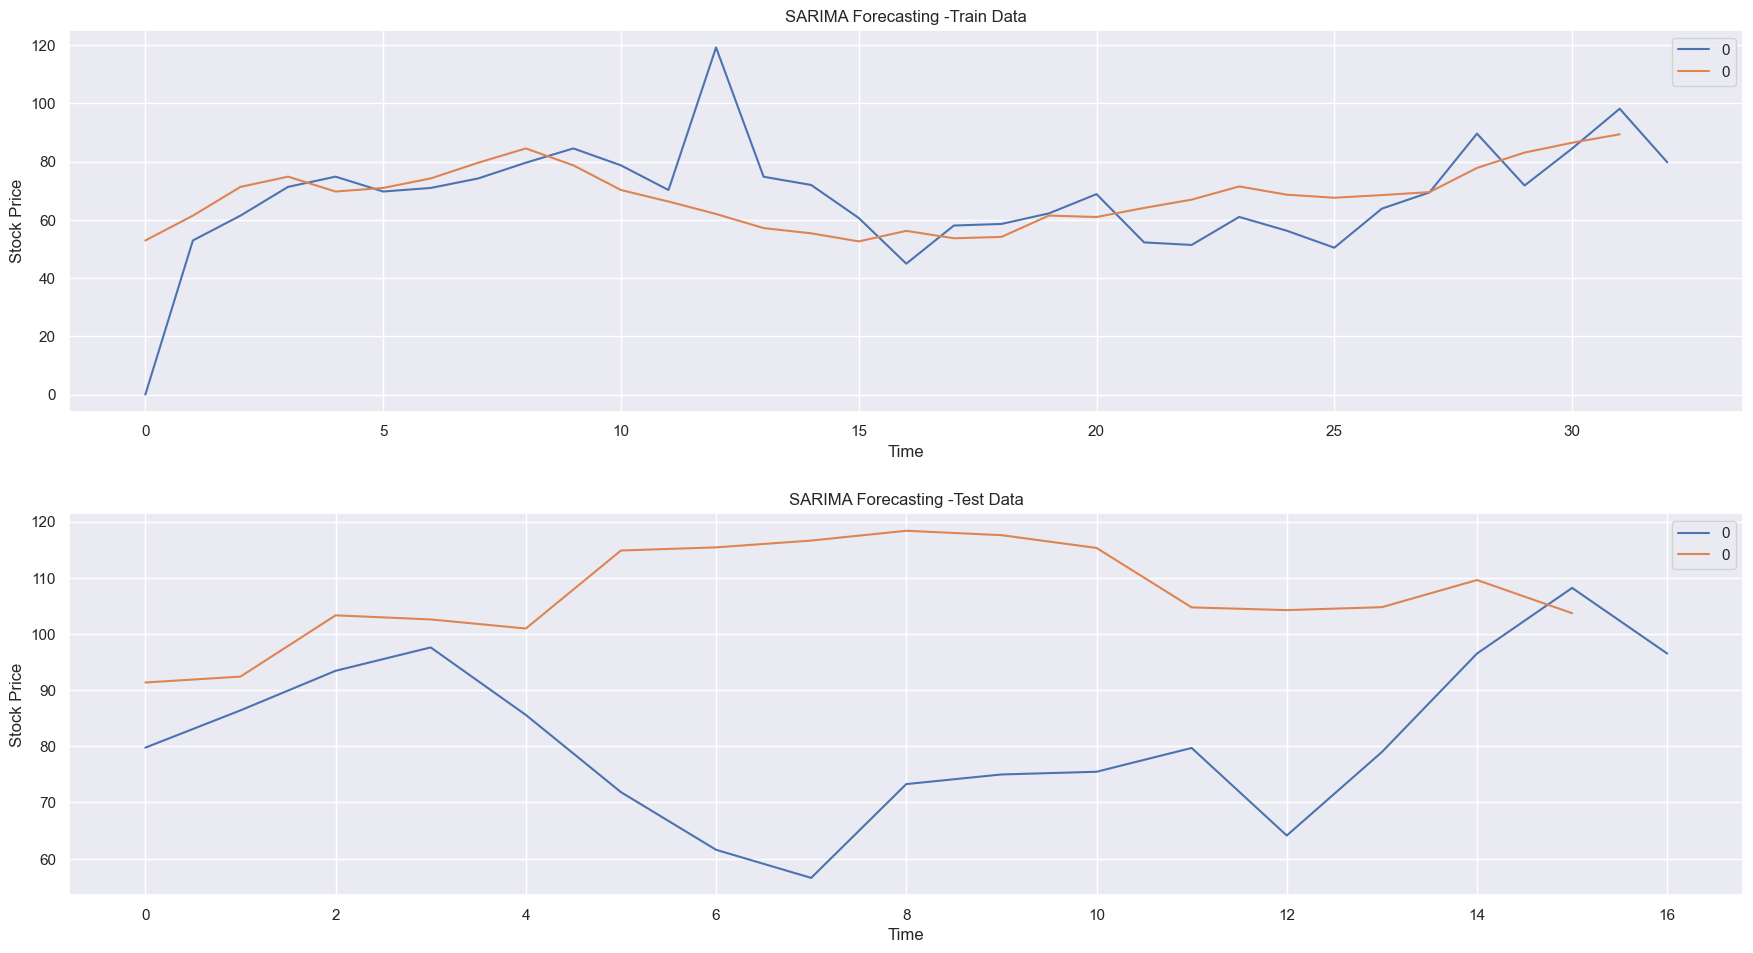

In [104]:
## Backtest Set-1
backtest_model(train_list[2],test_list[2])

Backtest Set-2

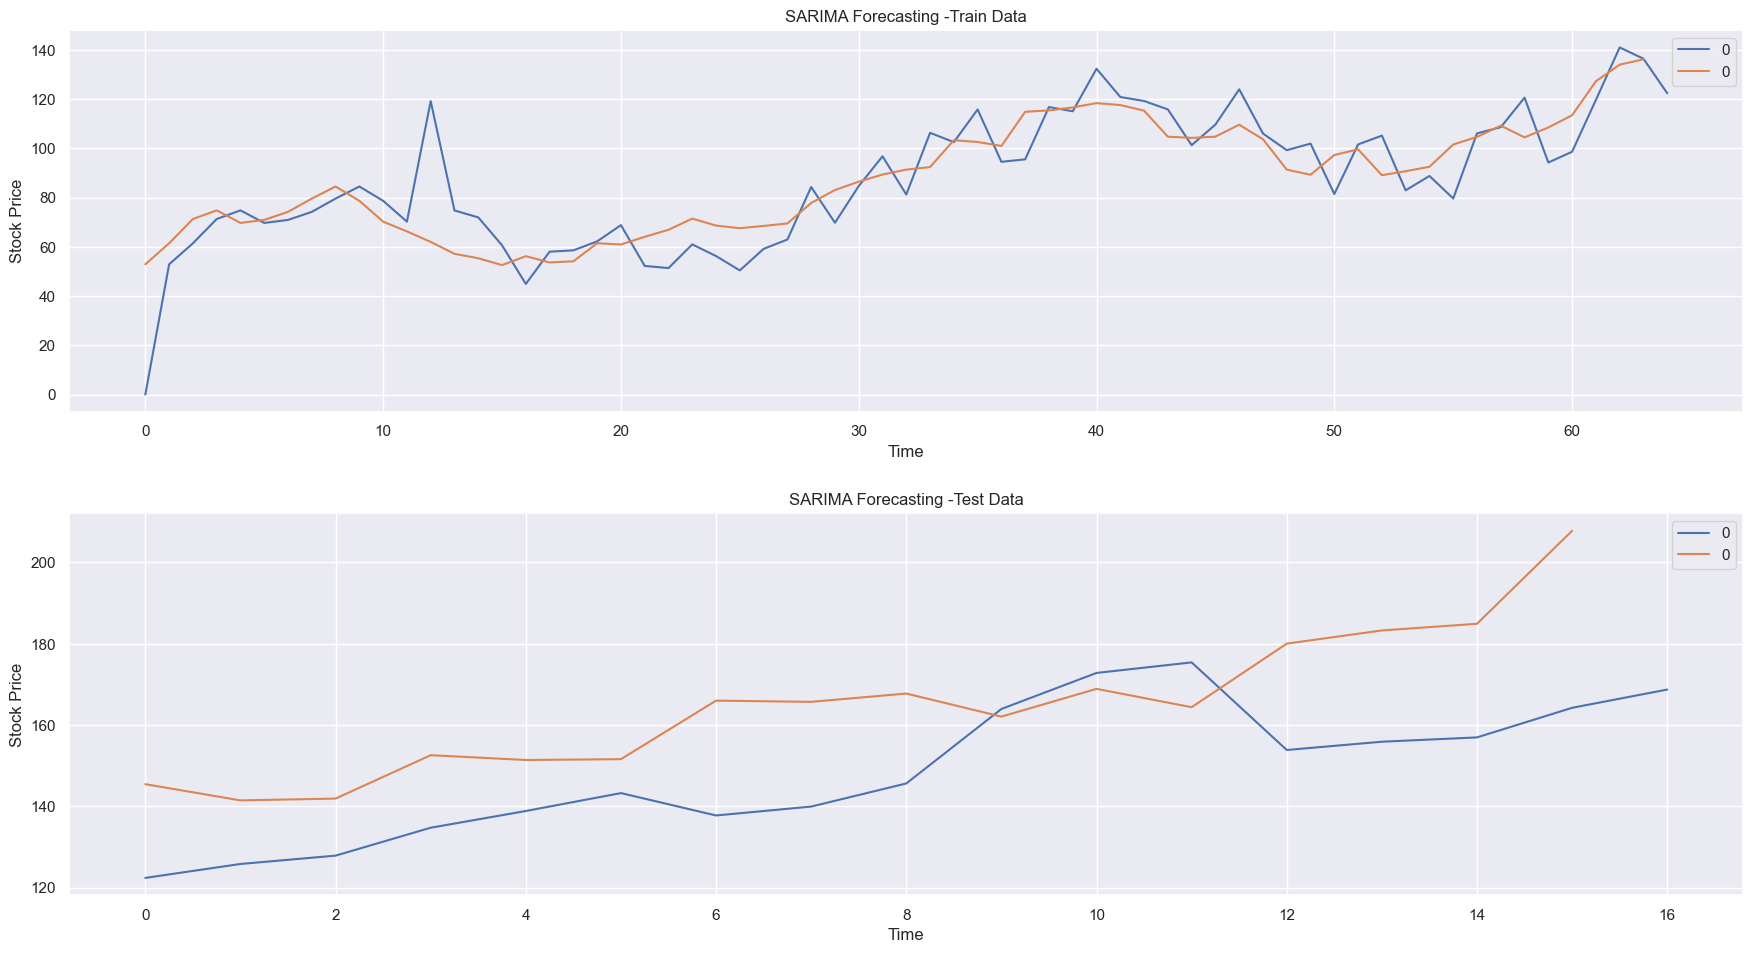

In [107]:
## Backtest Set-3
backtest_model(train_list[4],test_list[4])

Backtest Set-3

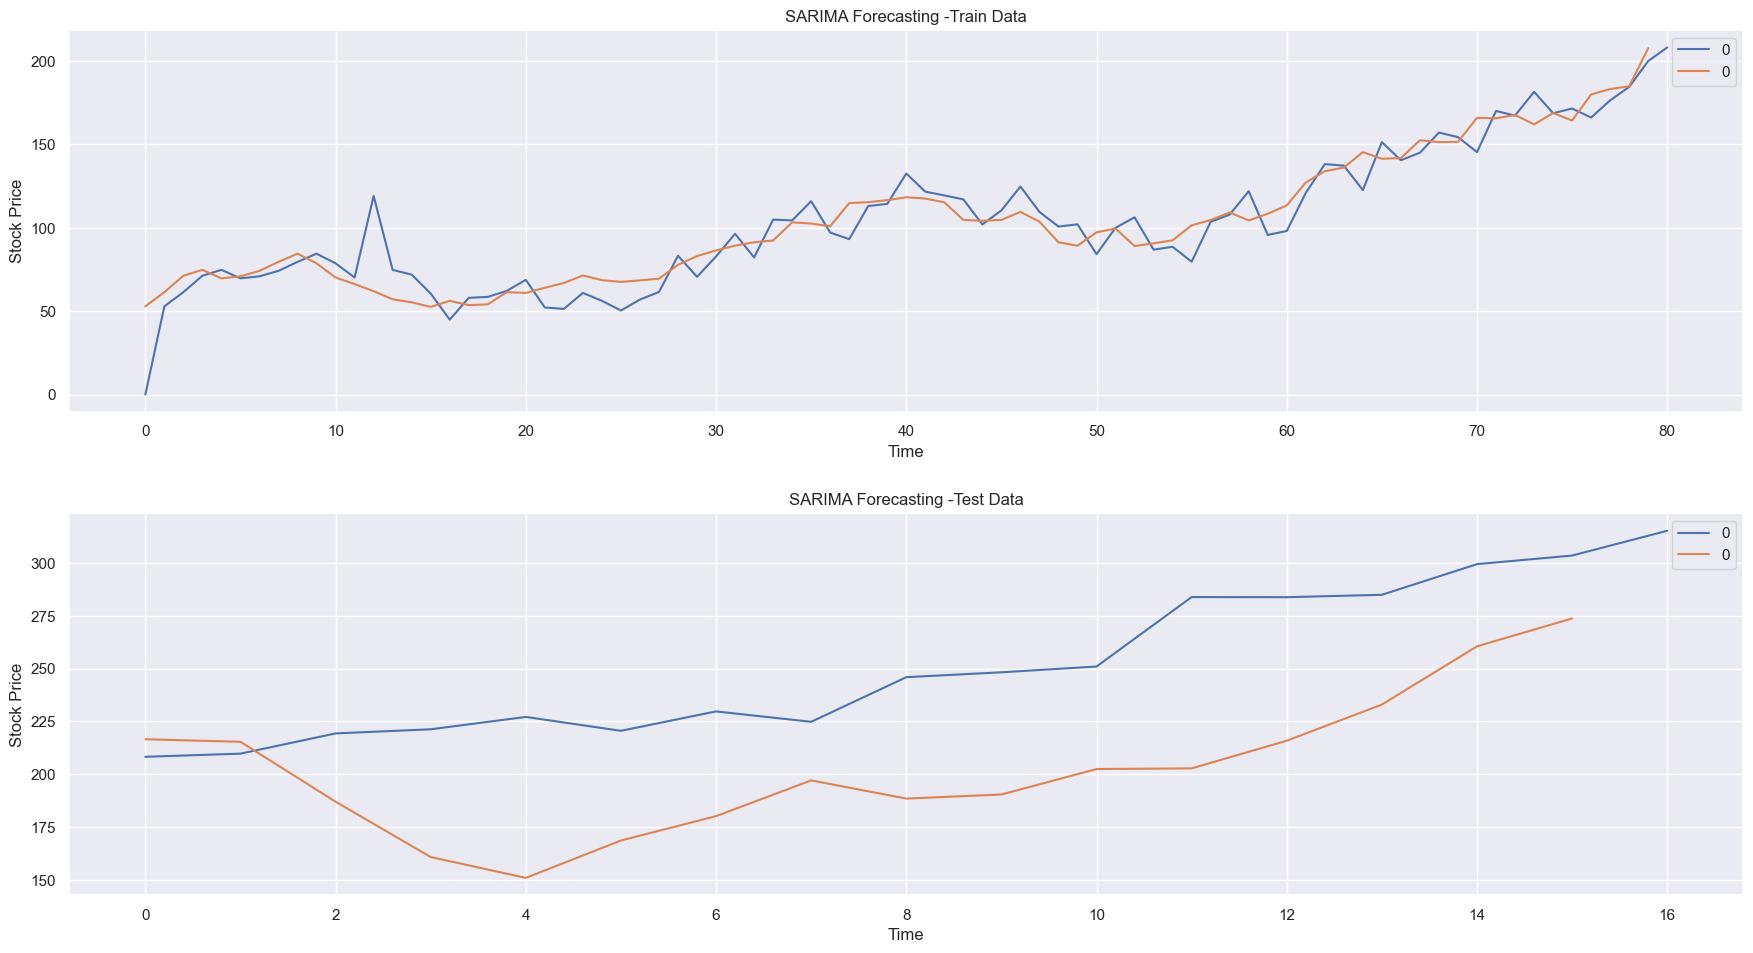

In [110]:
## Backtest Set-4
backtest_model(train_list[5],test_list[5])

By using backtesting we can validate our model on multiple train-test splits. Red is the training set and blue indicates test set.

Forecasting Seasonal ARIMA

In [114]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Example time series data
date_range = pd.date_range(start='2010-01-01', end='2020-01-01', freq='M')
data = np.random.randn(len(date_range))
train = pd.Series(data, index=date_range)

# Ensure the index is a DatetimeIndex
train.index = pd.to_datetime(train.index)

# Fit the SARIMAX model
model = sm.tsa.SARIMAX(train, order=(1,1,1), seasonal_order=(2,2,0,12))
results = model.fit()

# Predict within the training period
forecasts_train = results.predict(start='2012-01-31', end='2016-09-30', dynamic=False)

# Predict out-of-sample
forecasts_test = results.predict(start='2016-10-31', end='2019-12-31', dynamic=True)

print(forecasts_train.head())
print(forecasts_test.head())


2012-01-31    0.775093
2012-02-29   -1.863754
2012-03-31   -0.189521
2012-04-30    2.145371
2012-05-31    0.432916
Freq: ME, Name: predicted_mean, dtype: float64
2016-10-31    0.214809
2016-11-30    2.381212
2016-12-31    1.656865
2017-01-31   -0.879408
2017-02-28    2.020923
Freq: ME, Name: predicted_mean, dtype: float64


In [116]:
##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
  print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))

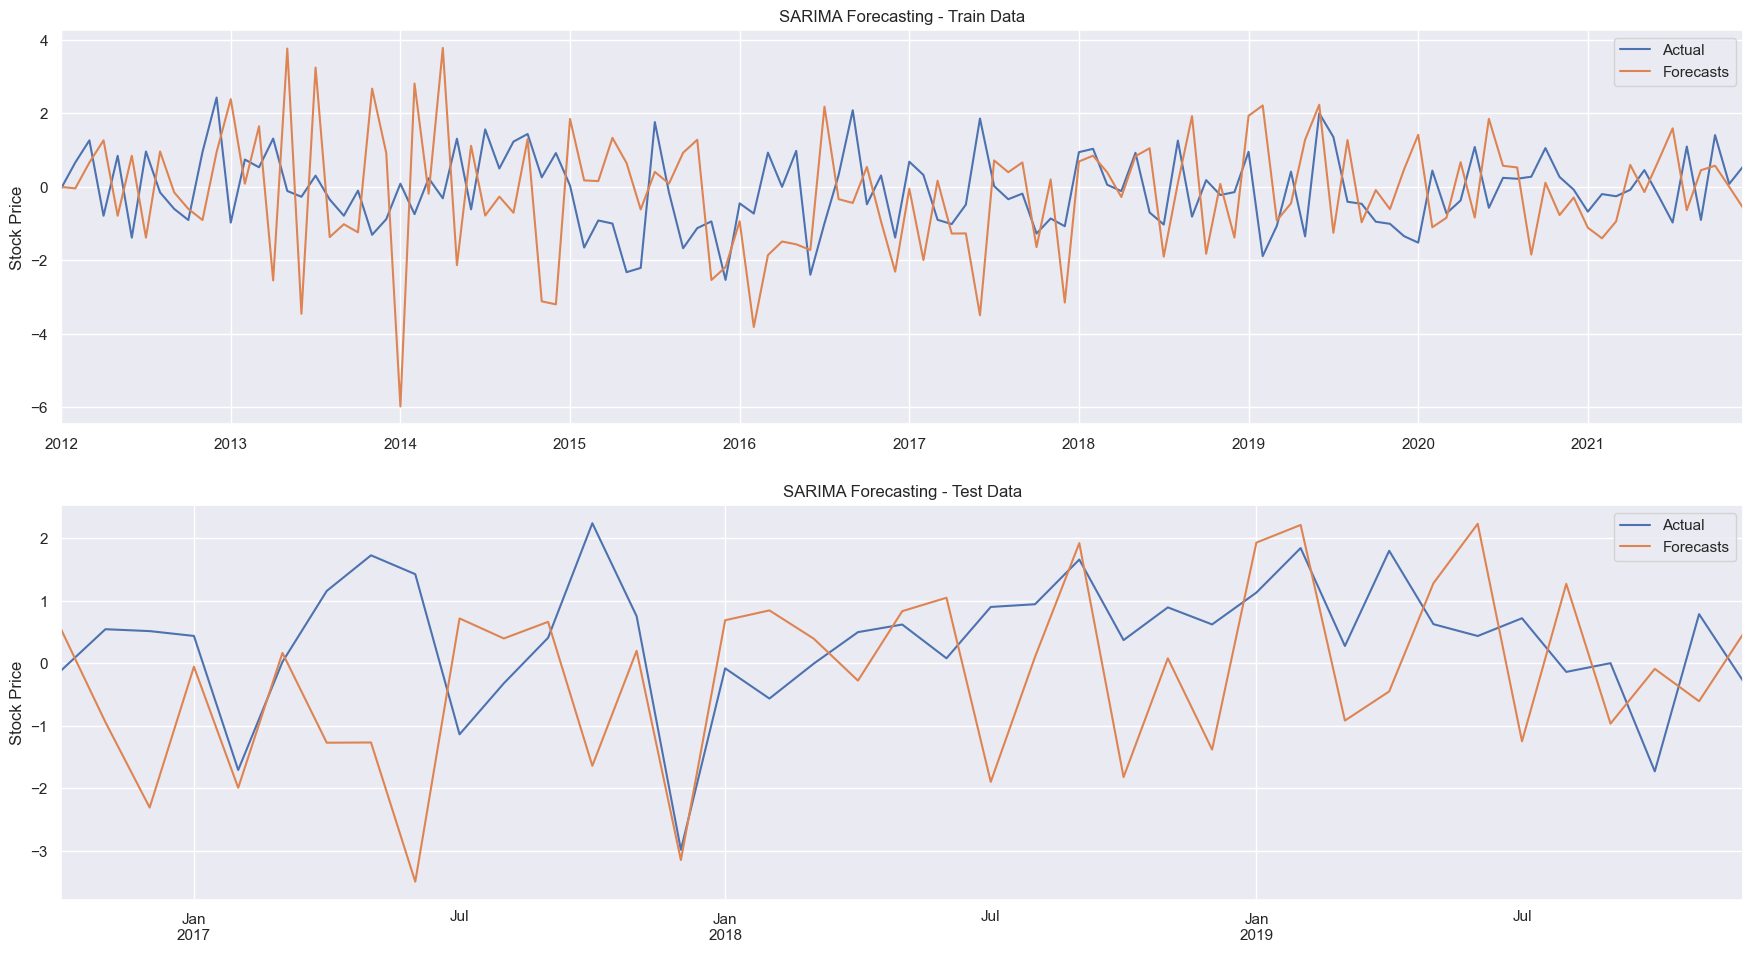

Result Metrics for SARIMA-Test Data
R2 Score :  -1.845
Mean Squared Error :  2.943
Mean Absolute Error :  1.341
None
----
Result Metrics for SARIMA-Train Data
R2 Score :  -2.826
Mean Squared Error :  3.861
Mean Absolute Error :  1.55
None


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Example train and test data (replace with your actual data)
train = pd.Series(np.random.randn(120), index=pd.date_range(start='2012-01-01', periods=120, freq='M'))
test = pd.Series(np.random.randn(39), index=pd.date_range(start='2016-10-01', periods=39, freq='M'))

# SARIMA model
model = sm.tsa.SARIMAX(train, order=(1,1,1), seasonal_order=(2,2,0,12))
results = model.fit()

# Forecasting
forecast_index_train = pd.date_range(start=train.index.min(), end=train.index.max(), freq='M')
forecasts_train = results.get_prediction(start=train.index.min(), end=train.index.max())
forecasts_train_series = pd.Series(forecasts_train.predicted_mean.values, index=forecast_index_train)

forecast_index_test = pd.date_range(start=test.index.min(), end=test.index.max(), freq='M')
forecasts_test = results.get_prediction(start=test.index.min(), end=test.index.max())
forecasts_test_series = pd.Series(forecasts_test.predicted_mean.values, index=forecast_index_test)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 10))

# Plot train data and forecasts
train.plot(label='Actual', ax=ax1)
forecasts_train_series.plot(label='Forecasts', ax=ax1, title='SARIMA Forecasting - Train Data')
ax1.set_ylabel('Stock Price')

# Plot test data and forecasts
test.plot(label='Actual', ax=ax2)
forecasts_test_series.plot(label='Forecasts', ax=ax2, title='SARIMA Forecasting - Test Data')
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)
plt.show()

# Function to calculate metrics
def result_metrics(test_series, forecast_series, model_name):
    print('Result Metrics for {}'.format(model_name))
    print('R2 Score : ', round(r2_score(test_series, forecast_series), 3))
    print('Mean Squared Error : ', round(mean_squared_error(test_series, forecast_series), 3))
    print('Mean Absolute Error : ', round(mean_absolute_error(test_series, forecast_series), 3))

# Print metrics
print(result_metrics(test, forecasts_test_series, 'SARIMA-Test Data'))
print('----')
print(result_metrics(train, forecasts_train_series, 'SARIMA-Train Data'))


Training and Test Accuracy is equivalent . Model Fit is good , no overfit or underfit.

In [121]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(2, 2, [], 12)   Log Likelihood                -188.946
Date:                             Tue, 17 Sep 2024   AIC                            387.892
Time:                                     22:28:37   BIC                            400.662
Sample:                                 01-31-2012   HQIC                           393.052
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1113      0.129      0.863      0.388      -0.141       0.364
ma.L1         -0.9996      

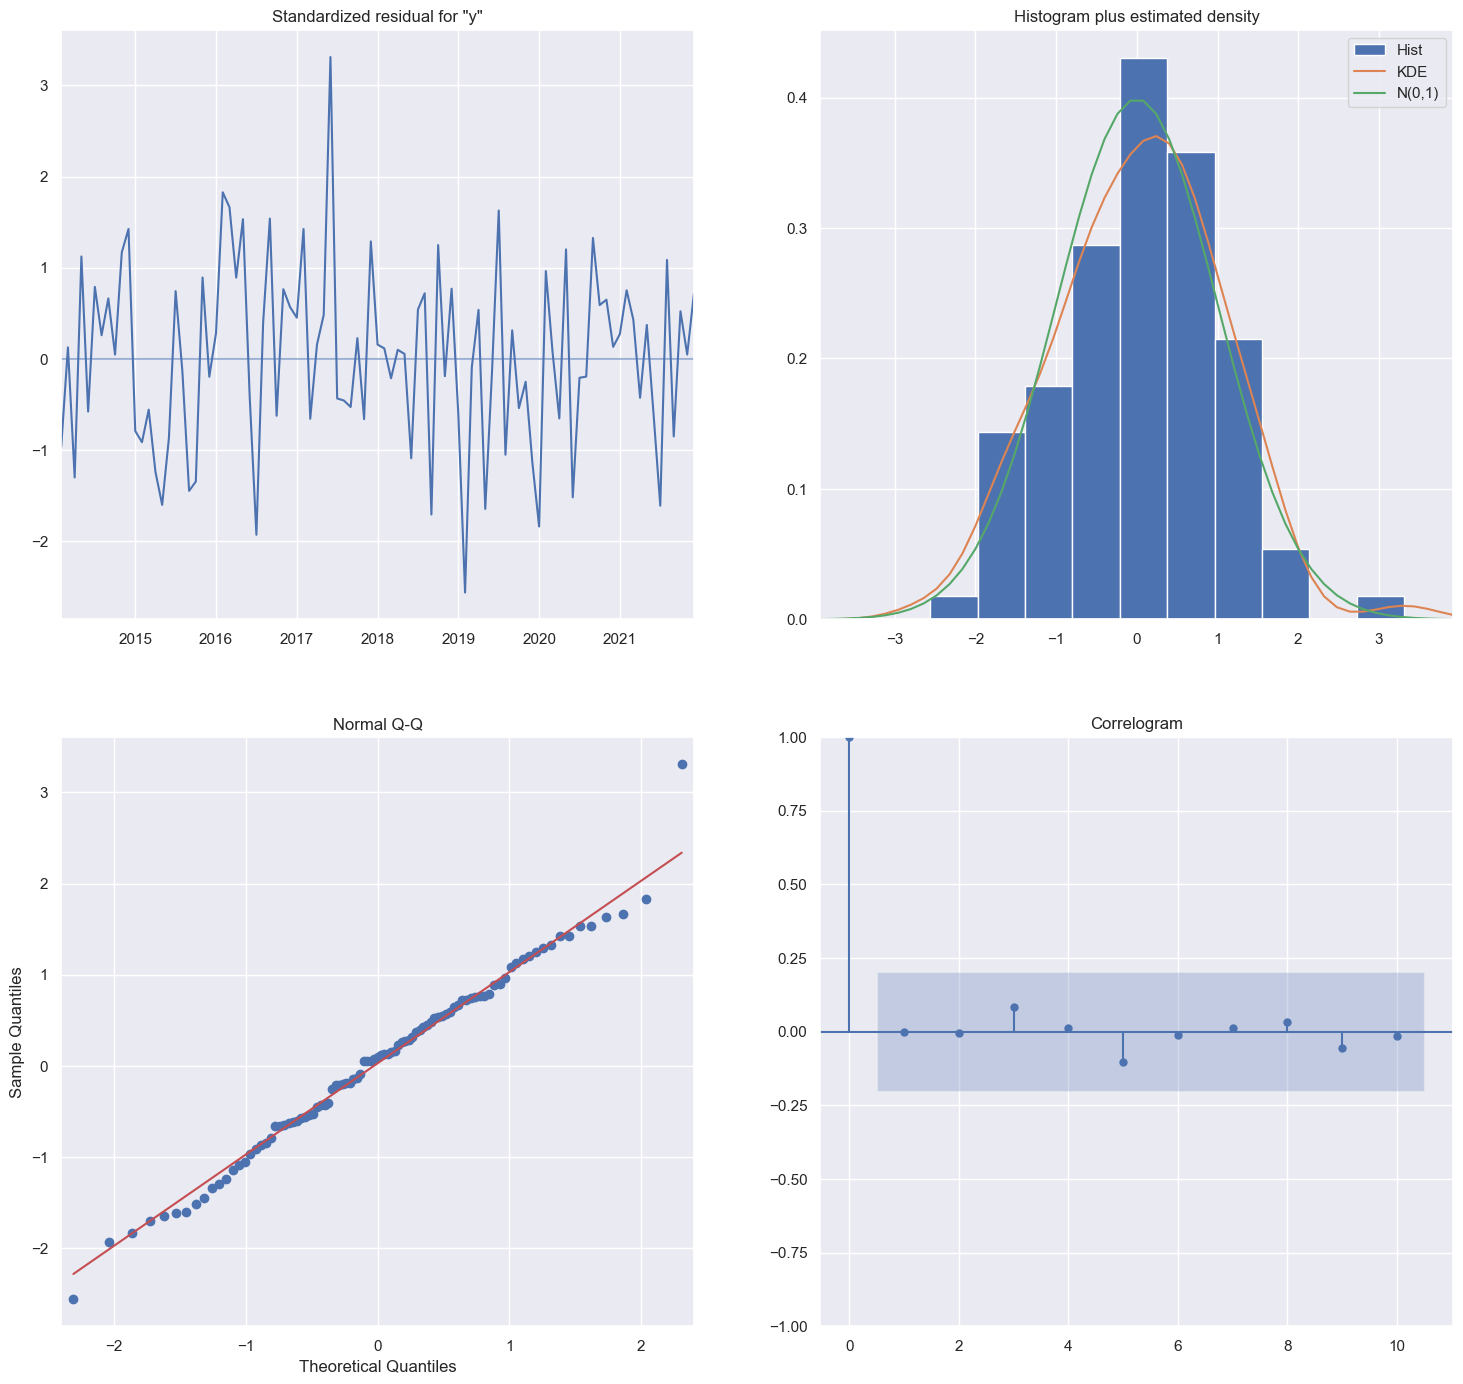

In [123]:
##Checking Model Diagnotics on Training Data
results.plot_diagnostics(figsize=(16, 16))
plt.show()

Inference from Residual Analysis :-

->We observe that the residual plot kind of follows stationarity.

->The Distribution of Training Data residuals is showing almost Normal Distribution.

->The QQPlot points towards Normal Distribution

->Correlogram shows no relation -which indicates they are un-correlated.

Overall the model is captured the Stock Price in a good manner.

Residual Analysis Test Data

In [127]:
# Extract the predicted values from the forecasts_test
forecasts_test_series = pd.Series(forecasts_test.predicted_mean.values, index=forecasts_test.predicted_mean.index)

# Ensure the indexes align
test_aligned = test.loc[forecasts_test_series.index]

# Calculate residuals
residuals_test = test_aligned - forecasts_test_series

# Display the residuals
print(residuals_test)


2016-10-31   -0.655922
2016-11-30    1.486002
2016-12-31    2.822858
2017-01-31    0.492017
2017-02-28    0.284168
2017-03-31   -0.142552
2017-04-30    2.428061
2017-05-31    2.994215
2017-06-30    4.919387
2017-07-31   -1.854730
2017-08-31   -0.717722
2017-09-30   -0.255088
2017-10-31    3.881227
2017-11-30    0.554518
2017-12-31    0.163784
2018-01-31   -0.769261
2018-02-28   -1.410437
2018-03-31   -0.400753
2018-04-30    0.775932
2018-05-31   -0.213783
2018-06-30   -0.968470
2018-07-31    2.798720
2018-08-31    0.842380
2018-09-30   -0.262298
2018-10-31    2.192033
2018-11-30    0.814736
2018-12-31    2.002205
2019-01-31   -0.799556
2019-02-28   -0.369993
2019-03-31    1.193425
2019-04-30    2.250413
2019-05-31   -0.655828
2019-06-30   -1.795346
2019-07-31    1.969066
2019-08-31   -1.409008
2019-09-30    0.966843
2019-10-31   -1.639616
2019-11-30    1.392755
2019-12-31   -0.761458
Freq: ME, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


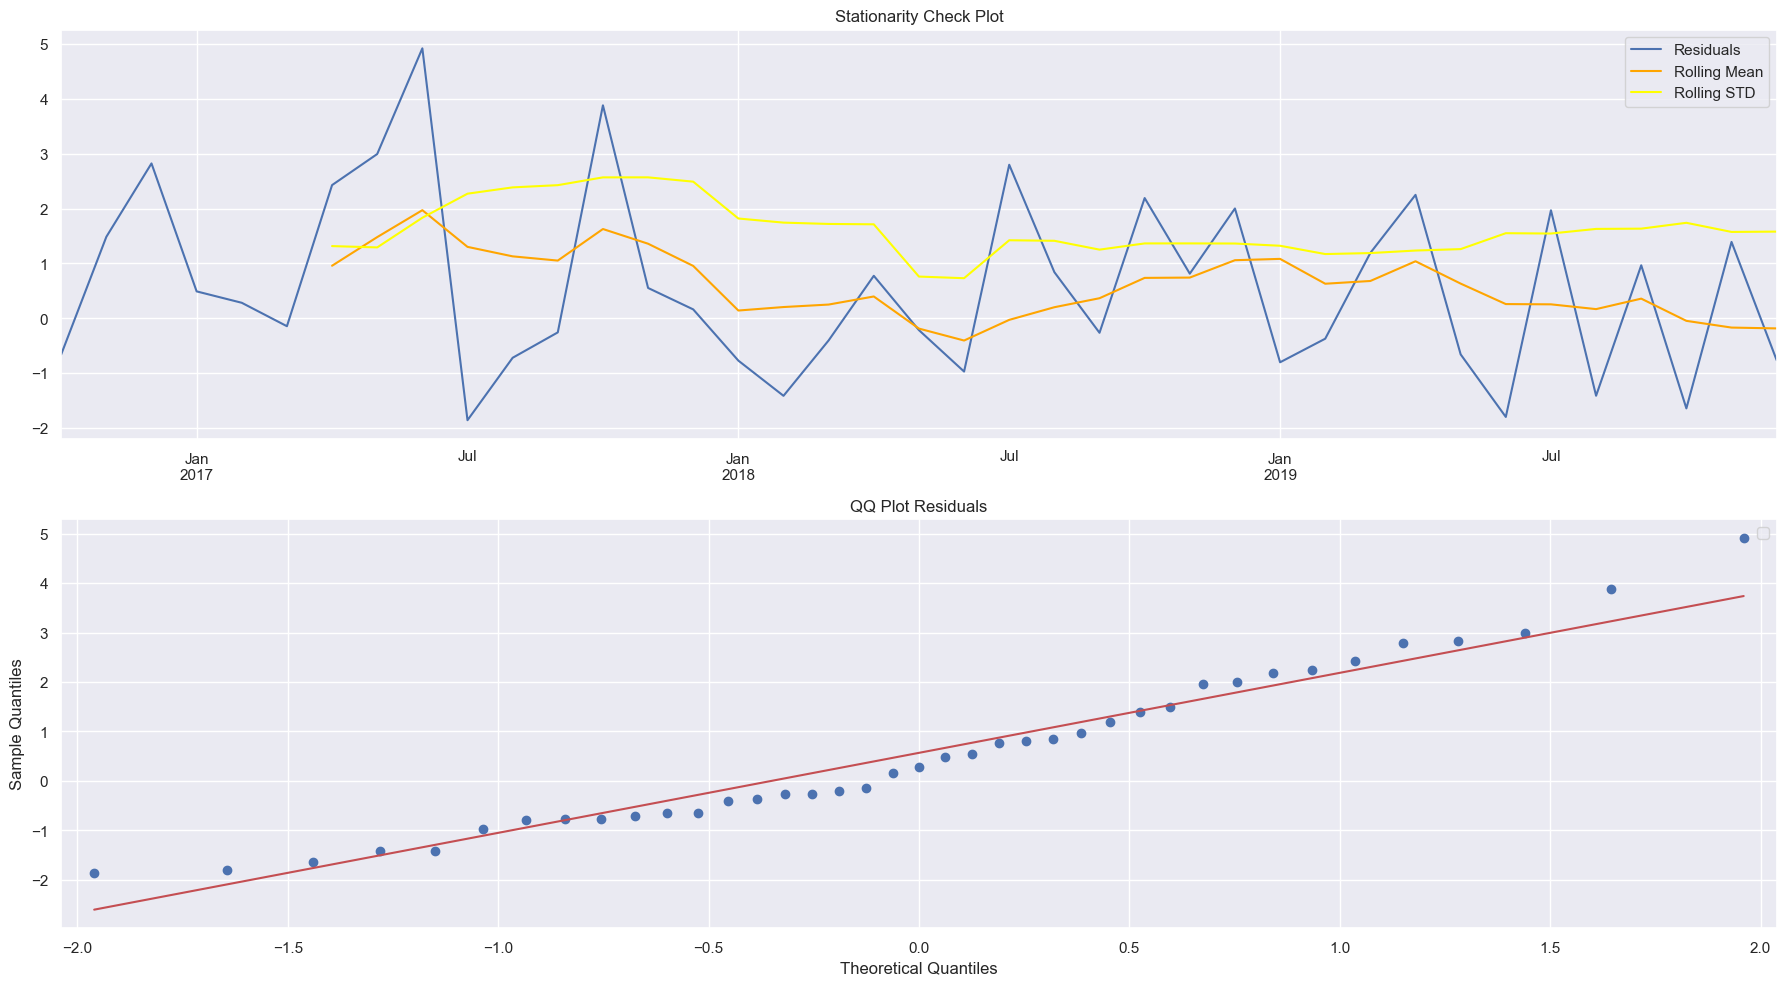

In [129]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))


residuals_test.plot(label='Residuals',ax=ax1,title='Stationarity Check Plot')
residuals_test.rolling(7).mean().plot(label='Rolling Mean',c='orange',ax=ax1)
residuals_test.rolling(7).std().plot(label='Rolling STD',c='yellow',ax=ax1)

qq_plot = qq(residuals_test,line='s',ax=ax2)
ax2.set_title('QQ Plot Residuals')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=1)

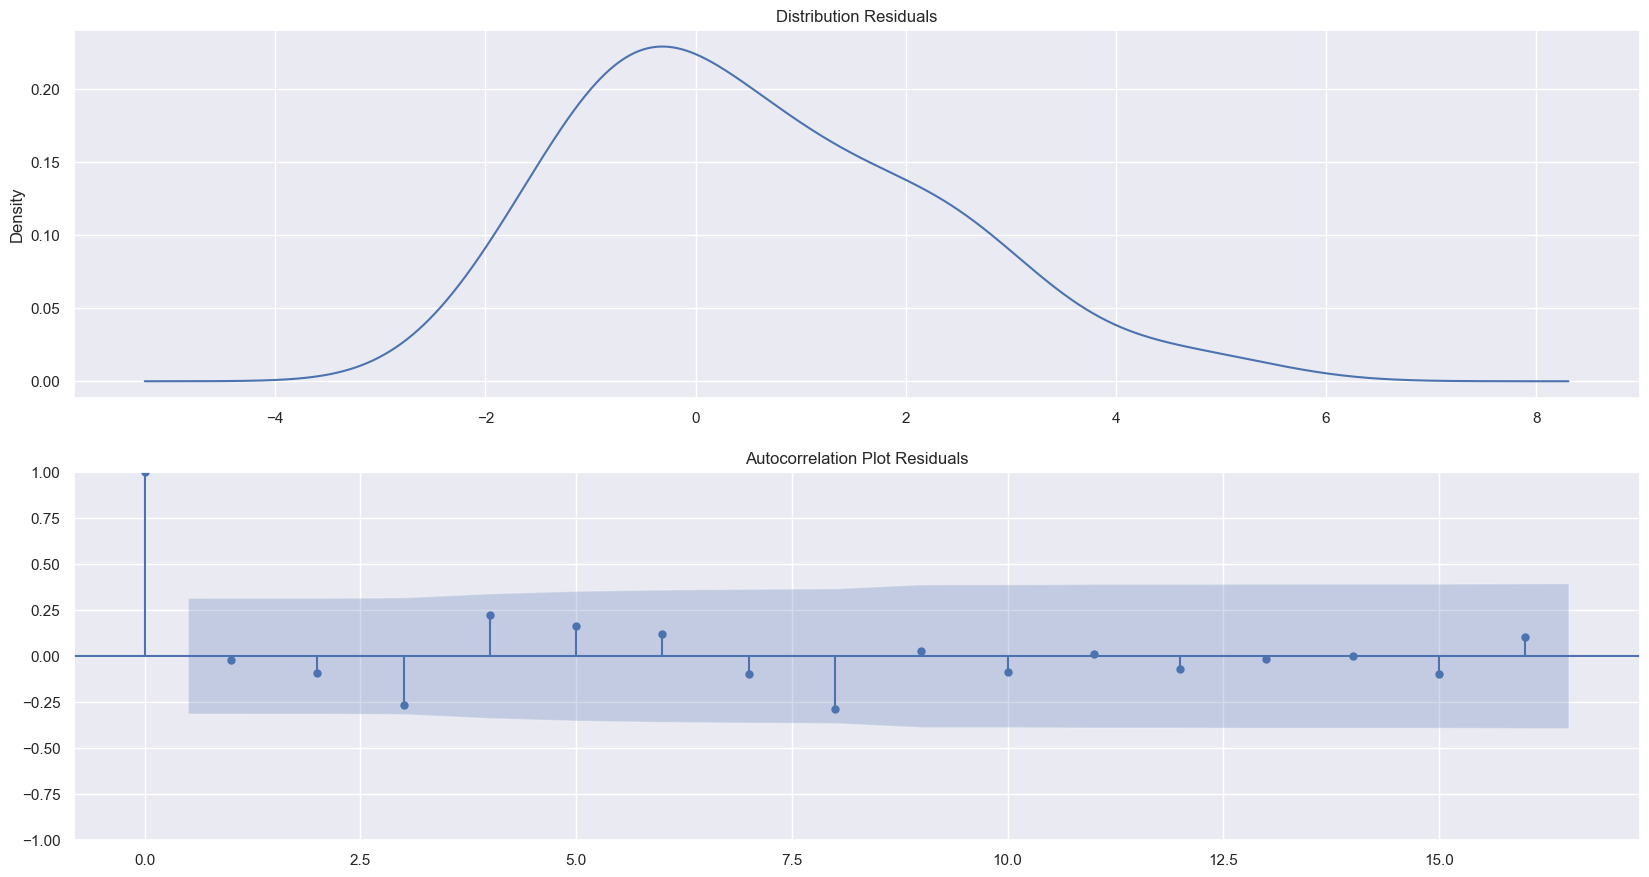

In [131]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

residuals_test.plot(kind='kde',ax=ax1,title='Distribution Residuals')

acf = plot_acf(residuals_test,ax=ax2,title='Autocorrelation Plot Residuals')

In [133]:
residuals_test.describe()

count    39.000000
mean      0.567767
std       1.639941
min      -1.854730
25%      -0.686822
50%       0.284168
75%       1.727534
max       4.919387
dtype: float64

In [135]:
train_list = {}
test_list = {}
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values

index = 1
for train_index, test_index in time_series_splits.split(X):
    train = X[train_index]
    test = X[test_index]
    train_list[index] = train
    test_list[index] = test
    index += 1

In [137]:
modelling_series

Date
2012-01-31     52.907298
2012-02-29     61.424381
2012-03-31     71.292448
2012-04-30     74.810151
2012-05-31     69.708045
                 ...    
2019-08-31    202.738817
2019-09-30    215.853332
2019-10-31    232.974974
2019-11-30    260.569057
2019-12-31    273.780717
Freq: ME, Name: Adj Close, Length: 96, dtype: float64

In [139]:
train_list[1]

array([52.90729845, 61.42438085, 71.29244814, 74.8101506 , 69.70804455,
       70.92884829, 74.20094186, 79.59537835, 84.49984068, 78.69092705,
       70.22318162, 66.26465915, 62.00116614, 57.15554147, 55.34968775,
       52.58421514, 56.195146  , 53.66024345, 54.116633  , 61.4545905 ])

In [141]:
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()


    # train_get_dates_beginning = '2012-01-31'
    # train_get_dates_ending = str(modelling_series.index[len(train)].date())
    # test_get_dates_beginning = train_get_dates_ending
    # test_get_dates_ending = str(modelling_series.index[len(train)+len(test)].date())


    # forecasts_train = results.predict(start=train_get_dates_beginning,end=train_get_dates_ending)
    # forecasts_test = results.predict(start=test_get_dates_beginning,end=test_get_dates_ending)

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

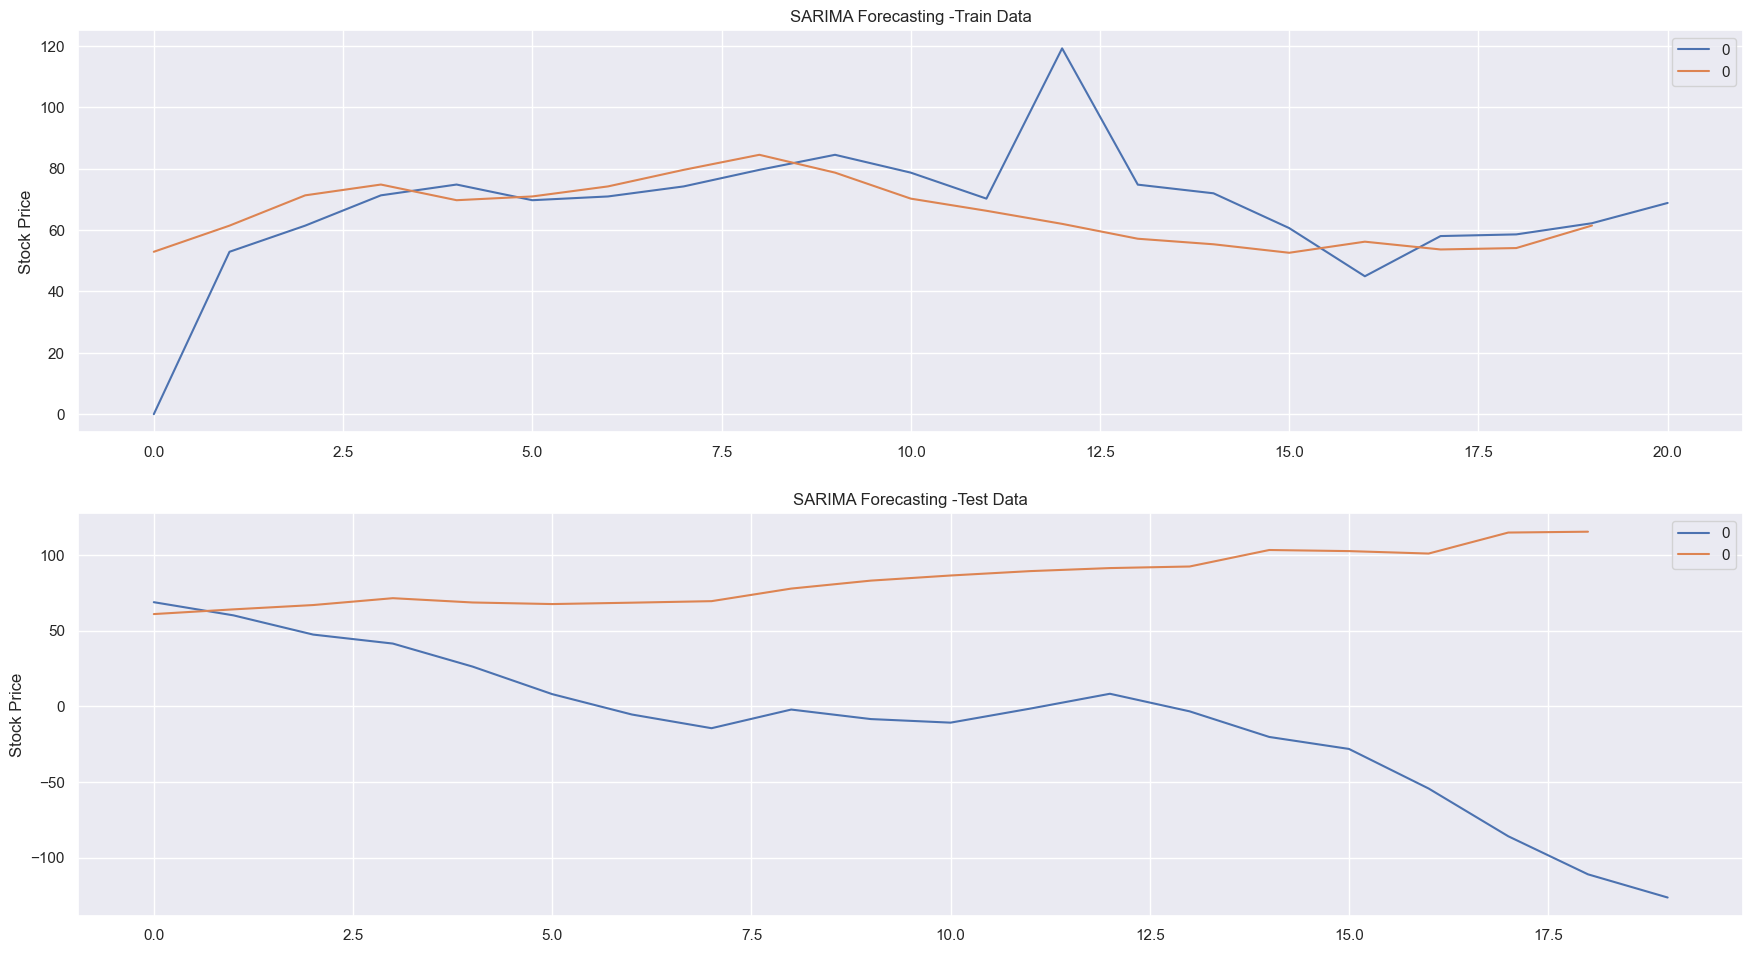

In [143]:
## Backtest Set-1
backtest_model(train_list[1],test_list[1])

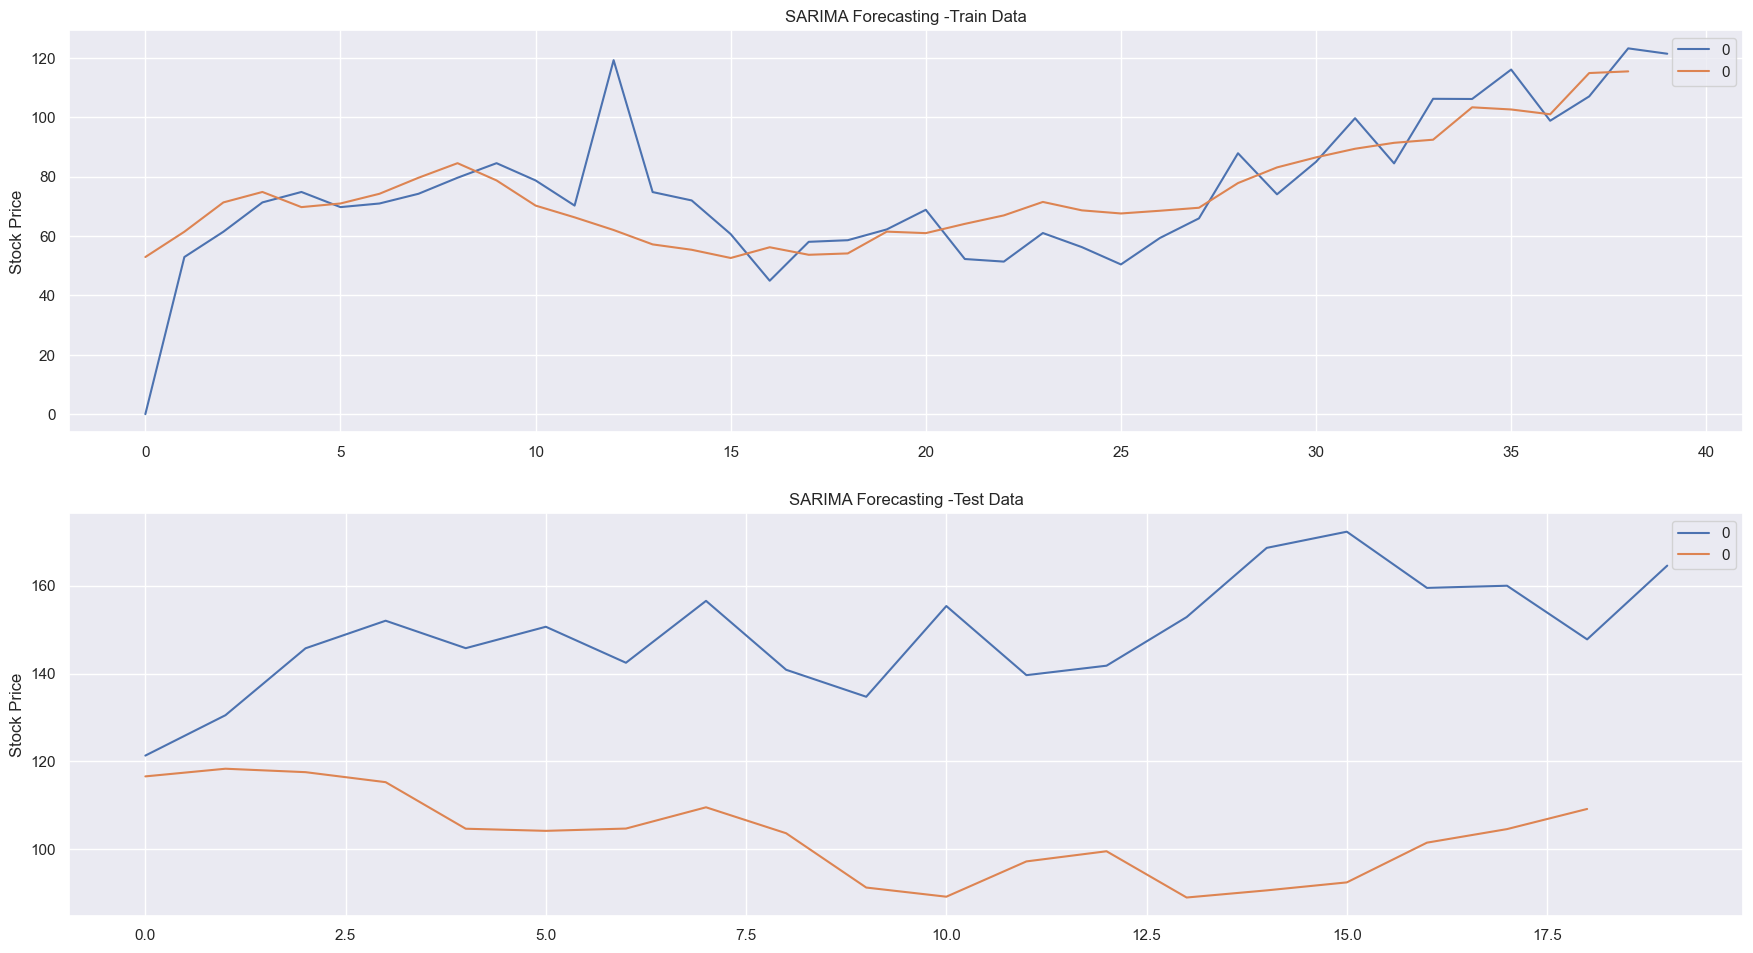

In [145]:
backtest_model(train_list[2],test_list[2])

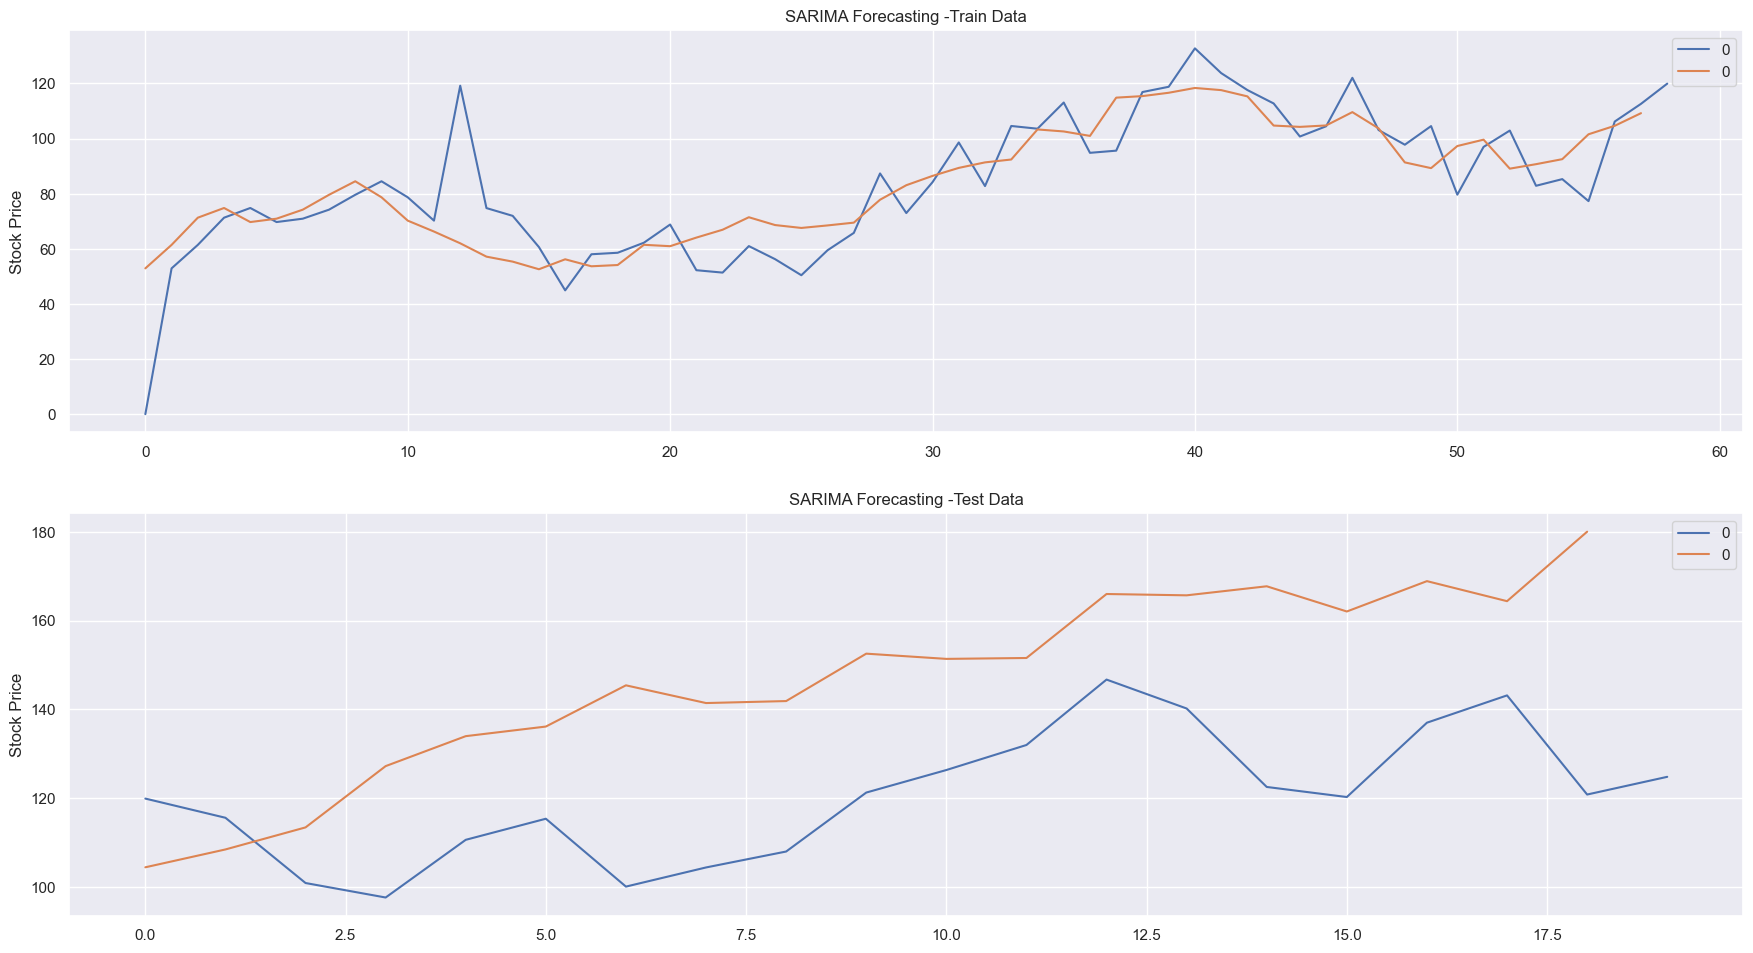

In [147]:
backtest_model(train_list[3],test_list[3])

In [149]:
forecasts_train

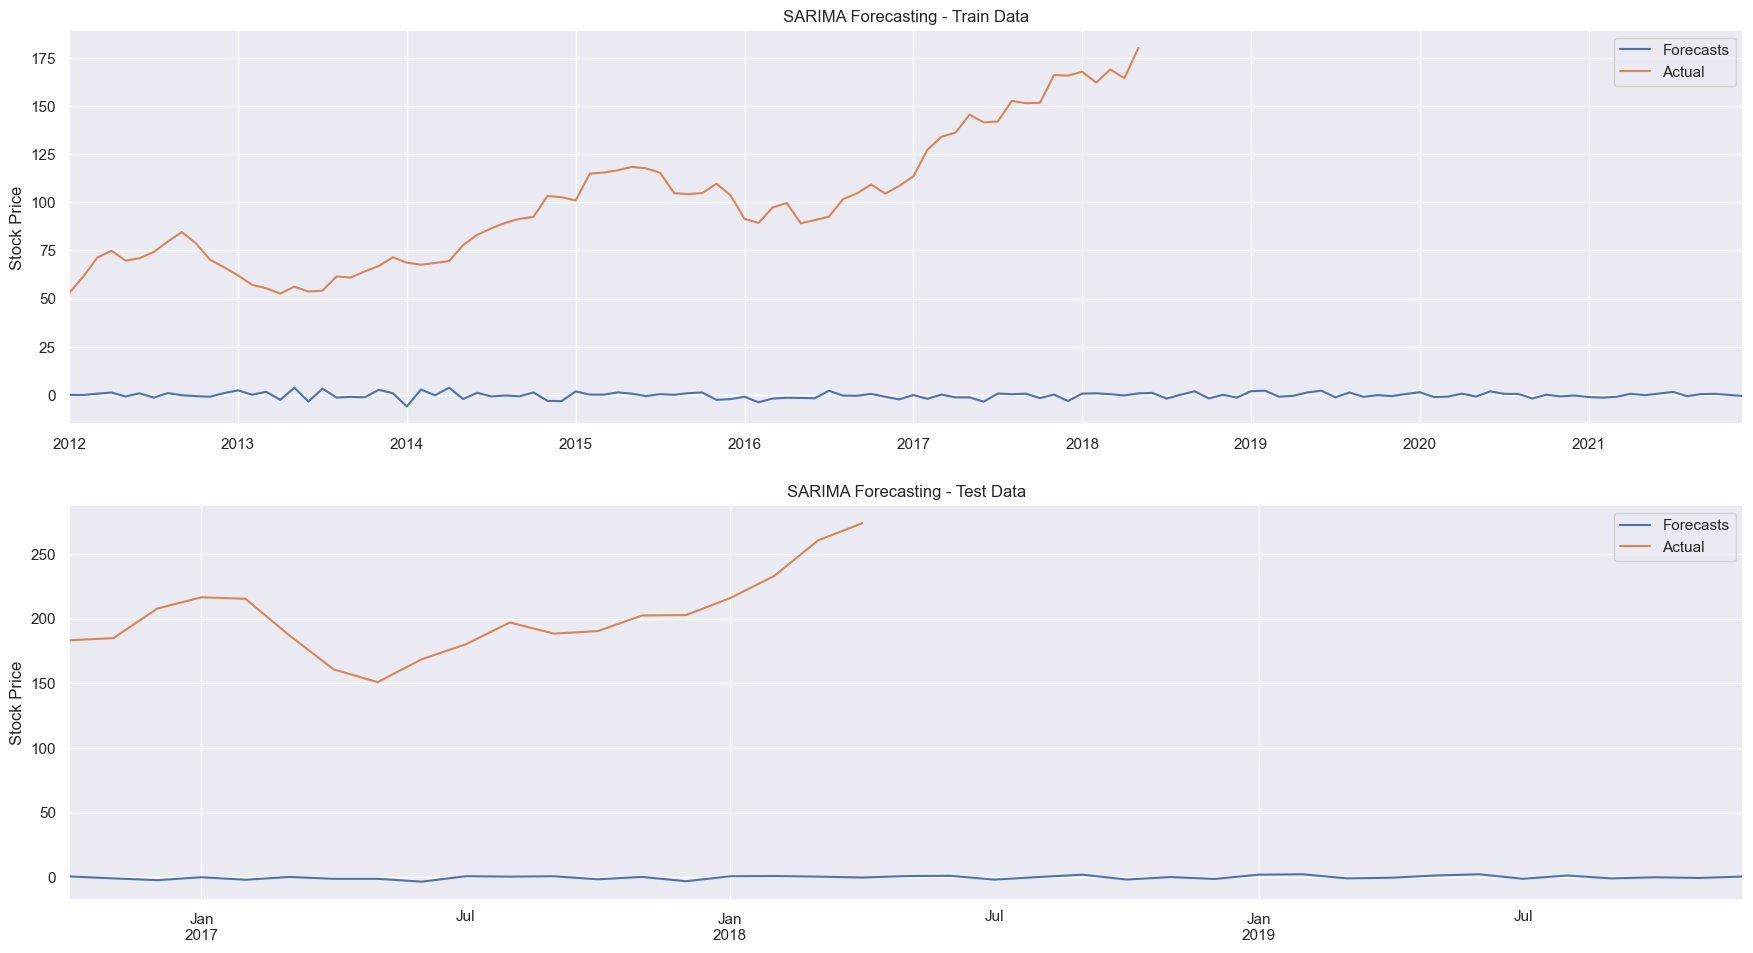

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train and test are NumPy arrays and you have corresponding dates for them
# Convert NumPy arrays to Pandas Series with a date index
train_series = pd.Series(train, index=pd.date_range(start='2012-01-01', periods=len(train), freq='M'))
test_series = pd.Series(test, index=pd.date_range(start='2016-10-01', periods=len(test), freq='M'))

# Create a figure and axis for the plots
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 10))

# Plot training forecasts and actual data
forecasts_train_series.plot(label='Forecasts', ax=ax1, title='SARIMA Forecasting - Train Data')
train_series.plot(label='Actual', ax=ax1)
ax1.set_ylabel('Stock Price')

# Plot testing forecasts and actual data
forecasts_test_series.plot(label='Forecasts', ax=ax2, title='SARIMA Forecasting - Test Data')
test_series.plot(label='Actual', ax=ax2)
ax2.set_ylabel('Stock Price')

# Add legends and layout adjustments
ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

# Show the plots
plt.show()


Seasonal ARIMA-Verdict

The mean value is close to zero but it suggests that there is some bias in the model. Overall the model has performed good for a problem like Stock Price Prediction being a difficult problem .